# Notebook de prediccion de encuentro, solo con resultados
Se generan als variables solo con los resultados de los partidos.

In [1]:
import sys
import pandas as pd #lectura de datos
import numpy as np # biblioteca con operaciones matemáticas y algebra lineal

#viz y plots bonitos
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('ggplot')
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams[u'figure.figsize'] = (16,12)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large'}
plt.rcParams.update(params)

# Prediccion de resultados en partidos

Corresponde a los torneos de Clausura y Apertura 2017-2018

In [2]:
df = pd.read_csv('/home/serch/mexico/2017-18/1-liga.csv')
df.drop(['Round','HT'],1, inplace=True)
df.head()

Date                Team 1   FT             Team 2
0  (Sat) 22 Jul 2017 (29)  Monarcas Morelia (1)  0-0   CF Monterrey (1)
1  (Sat) 22 Jul 2017 (29)      Club Tijuana (1)  0-2      Cruz Azul (1)
2  (Sat) 22 Jul 2017 (29)      Club América (1)  0-1   Querétaro FC (1)
3  (Sat) 22 Jul 2017 (29)        Lobos BUAP (1)  2-2  Santos Laguna (1)
4  (Sun) 23 Jul 2017 (29)       Tigres UANL (1)  5-0    Club Puebla (1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 4 columns):
Date      332 non-null object
Team 1    332 non-null object
FT        332 non-null object
Team 2    332 non-null object
dtypes: object(4)
memory usage: 10.5+ KB


In [4]:
df['dia'] = df.Date.str.split().str[0].str[1:4]
df['mes'] = df.Date.str.split().str[2]

In [5]:
df['equipo_local'] = df['Team 1'].str.split().str[:-1].str.join(sep=' ')
df['equipo_visitante'] = df['Team 2'].str.split().str[:-1].str.join(sep=' ')

In [6]:
df['goles_local'] = df.FT.str.split('-').str[0].astype(int)
df['goles_visitante'] = df.FT.str.split('-').str[1].astype(int)

In [7]:
df['resultado'] = np.where(df.goles_local > df.goles_visitante, 'local',
                          np.where(df.goles_local == df.goles_visitante, 'empate',
                                  'visitante'))

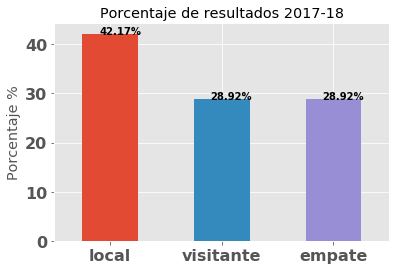

In [8]:
res = df.resultado.value_counts(normalize=True) * 100
res.plot.bar(rot=0, title='Porcentaje de resultados 2017-18')
plt.ylabel('Porcentaje %')
for ind,i in enumerate(res.values):
    plt.text(ind-0.1,i,str(round(i,2))+'%')

In [9]:
# NO ES EL NUMERO DE PUNTOS, A LO MEJOR ES EL NUMERO DE PARTIDOS
df['numero_partidos_local'] = df['Team 1'].str.split().str[-1].str.replace('(','').str.replace(')','').astype(int) -1
df['numero_partidos_visitante'] = df['Team 2'].str.split().str[-1].str.replace('(','').str.replace(')','').astype(int) -1

In [10]:
df.head()

Date                Team 1   FT             Team 2  dia  \
0  (Sat) 22 Jul 2017 (29)  Monarcas Morelia (1)  0-0   CF Monterrey (1)  Sat   
1  (Sat) 22 Jul 2017 (29)      Club Tijuana (1)  0-2      Cruz Azul (1)  Sat   
2  (Sat) 22 Jul 2017 (29)      Club América (1)  0-1   Querétaro FC (1)  Sat   
3  (Sat) 22 Jul 2017 (29)        Lobos BUAP (1)  2-2  Santos Laguna (1)  Sat   
4  (Sun) 23 Jul 2017 (29)       Tigres UANL (1)  5-0    Club Puebla (1)  Sun   

   mes      equipo_local equipo_visitante  goles_local  goles_visitante  \
0  Jul  Monarcas Morelia     CF Monterrey            0                0   
1  Jul      Club Tijuana        Cruz Azul            0                2   
2  Jul      Club América     Querétaro FC            0                1   
3  Jul        Lobos BUAP    Santos Laguna            2                2   
4  Jul       Tigres UANL      Club Puebla            5                0   

   resultado  numero_partidos_local  numero_partidos_visitante  
0     empate                      0                          0  
1  visitante                      0                          0  
2  visitante                      0                          0  
3     empate                      0                          0  
4      local                      0                          0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 13 columns):
Date                         332 non-null object
Team 1                       332 non-null object
FT                           332 non-null object
Team 2                       332 non-null object
dia                          332 non-null object
mes                          332 non-null object
equipo_local                 332 non-null object
equipo_visitante             332 non-null object
goles_local                  332 non-null int64
goles_visitante              332 non-null int64
resultado                    332 non-null object
numero_partidos_local        332 non-null int64
numero_partidos_visitante    332 non-null int64
dtypes: int64(4), object(9)
memory usage: 33.8+ KB


## Faltan estas variables
### Agregar Momementum de equipo si viene ganando o perdiendo

### Perder al hilo
### empatar al hilo
### Porcentaje de partidos ganados, perdidos o empatados

In [12]:
df.resultado.unique()

array(['empate', 'visitante', 'local'], dtype=object)

### Racha de ganes

In [13]:
# suma de goles del equipo en el partido actual durante el torneo
el = df.equipo_local.unique()

df_res = df[['equipo_local','equipo_visitante','resultado']]
df_res['historico_racha_ganadora_local'] = np.nan
df_res['historico_racha_ganadora_visitante'] = np.nan


for e1 in el:
    
    num_ganes = 0
    ind_local = df_res[df_res.equipo_local == e1].index.values
    ind_visitante = df_res[df_res.equipo_visitante == e1].index.values
    ind = sorted(df_res[(df_res.equipo_local == e1) | (df_res.equipo_visitante == e1)].index.values)
    ind_mas_uno = 0
    
    for match in ind:
        try:
            
            # se ponen los goles anteriores al partido actual para evitar el future leak.
            if ind[ind_mas_uno] in ind_local:
                df_res.loc[ind[ind_mas_uno], 'historico_racha_ganadora_local'] = num_ganes
            elif ind[ind_mas_uno] in ind_visitante:
                df_res.loc[ind[ind_mas_uno], 'historico_racha_ganadora_visitante'] = num_ganes
        
            # suma de goles
            if match in ind_local:
                if df_res.loc[match,'resultado'] == 'local':
                    num_ganes = num_ganes + 1
                    ind_mas_uno = ind_mas_uno + 1
                else:
                    num_ganes = 0
                    ind_mas_uno = ind_mas_uno + 1
                    
            elif match in ind_visitante:
                if df_res.loc[match,'resultado'] == 'vistante':
                    num_ganes = num_ganes + 1
                    ind_mas_uno = ind_mas_uno + 1
                else:
                    num_ganes = 0
                    ind_mas_uno = ind_mas_uno + 1
                
            
        except IndexError:
            continue

/home/serch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/serch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/serch/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [14]:
df_res = df_res.fillna(0)

In [15]:
# JOIN DE VARIABLE
df = df.join(df_res[['historico_racha_ganadora_local','historico_racha_ganadora_visitante']])

In [16]:
# check
df[['Team 1', 'FT','Team 2','resultado','historico_racha_ganadora_local','historico_racha_ganadora_visitante']][(
    df.equipo_local == 'Tigres UANL')|(df.equipo_visitante == 'Tigres UANL')]

Team 1   FT                         Team 2  \
4                  Tigres UANL (1)  5-0                Club Puebla (1)   
17               Santos Laguna (2)  1-1                Tigres UANL (2)   
21                 Tigres UANL (3)  1-1               Querétaro FC (3)   
32                  CF Pachuca (4)  2-1                Tigres UANL (4)   
40                 Tigres UANL (5)  2-0                 Pumas UNAM (5)   
49                Club América (6)  2-2                Tigres UANL (6)   
56                 Tigres UANL (7)  3-2                 Lobos BUAP (7)   
71            Monarcas Morelia (9)  3-3                Tigres UANL (8)   
83               Club Tijuana (10)  0-1                Tigres UANL (9)   
92                Tigres UANL (10)  1-0     CD Guadalajara Chivas (11)   
102                 Club León (12)  1-0               Tigres UANL (11)   
108               Tigres UANL (12)  1-0  Tiburones Rojos Veracruz (13)   
119               Tigres UANL (13)  3-0       Deportivo Toluca FC (14)   
125                 Cruz Azul (15)  1-2               Tigres UANL (14)   
133                Club Atlas (15)  1-1               Tigres UANL (15)   
141               Tigres UANL (16)  1-0               Club Necaxa (16)   
148              CF Monterrey (17)  2-0               Tigres UANL (17)   
154                 Club León (18)  1-1               Tigres UANL (18)   
157               Tigres UANL (19)  1-1                 Club León (19)   
161              Club América (20)  0-1               Tigres UANL (20)   
163               Tigres UANL (21)  3-0              Club América (21)   
165               Tigres UANL (22)  1-1              CF Monterrey (22)   
166              CF Monterrey (23)  1-2               Tigres UANL (23)   
167               Club Puebla (18)  2-1               Tigres UANL (24)   
180               Tigres UANL (25)  2-1             Santos Laguna (19)   
188              Querétaro FC (20)  0-0               Tigres UANL (26)   
197               Tigres UANL (27)  3-2                CF Pachuca (21)   
211                Pumas UNAM (22)  2-0               Tigres UANL (28)   
216               Tigres UANL (29)  1-1              Club América (27)   
222                Lobos BUAP (24)  0-0               Tigres UANL (30)   
232               Tigres UANL (31)  2-0                Club Atlas (27)   
243               Tigres UANL (32)  2-1          Monarcas Morelia (30)   
256  Tiburones Rojos Veracruz (27)  0-2               Tigres UANL (33)   
262               Tigres UANL (34)  1-0              Club Tijuana (28)   
273     CD Guadalajara Chivas (29)  0-0               Tigres UANL (35)   
279               Tigres UANL (36)  4-1                 Club León (32)   
291       Deportivo Toluca FC (33)  1-0               Tigres UANL (37)   
296               Tigres UANL (38)  2-2                 Cruz Azul (34)   
308               Club Necaxa (33)  1-1               Tigres UANL (39)   
314               Tigres UANL (40)  2-2              CF Monterrey (40)   
322               Tigres UANL (41)  2-0             Santos Laguna (35)   
327             Santos Laguna (36)  2-0               Tigres UANL (42)   

     resultado  historico_racha_ganadora_local  \
4        local                             0.0   
17      empate                             0.0   
21      empate                             0.0   
32       local                             0.0   
40       local                             0.0   
49      empate                             0.0   
56       local                             0.0   
71      empate                             0.0   
83   visitante                             0.0   
92       local                             0.0   
102      local                             0.0   
108      local                             0.0   
119      local                             1.0   
125  visitante                             0.0   
133     empate                             0.0   
141      local                             0.

### Historico goles

In [17]:
# suma de goles del equipo en el partido actual durante el torneo
el = df.equipo_local.unique()

df_res = df[['equipo_local','equipo_visitante',
             'goles_local','goles_visitante']]
df_res['historico_goles_local'] = np.nan
df_res['historico_goles_visitante'] = np.nan


for e1 in el:
    
    goles = 0
    ind_local = df_res[df_res.equipo_local == e1].index.values
    ind_visitante = df_res[df_res.equipo_visitante == e1].index.values
    ind = sorted(df_res[(df_res.equipo_local == e1) | (df_res.equipo_visitante == e1)].index.values)
    ind_mas_uno = 0
    
    for match in ind:
        try:
            # suma de goles
            if match in ind_local:
                goles = goles + df_res.loc[match,'goles_local']
                ind_mas_uno = ind_mas_uno + 1        
            elif match in ind_visitante:
                goles = goles + df_res.loc[match, 'goles_visitante']
                ind_mas_uno = ind_mas_uno + 1
                
            # se ponen los goles anteriores al partido actual para evitar el future leak.
            if ind[ind_mas_uno] in ind_local:
                df_res.loc[ind[ind_mas_uno], 'historico_goles_local'] = goles
            elif ind[ind_mas_uno] in ind_visitante:
                df_res.loc[ind[ind_mas_uno], 'historico_goles_visitante'] = goles
        
        except IndexError:
            continue

/home/serch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/serch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [18]:
df_res = df_res.fillna(0)

In [19]:
# JOIN DE VARIABLE
df = df.join(df_res[['historico_goles_local', 'historico_goles_visitante']])

In [20]:
# check
df[['Team 1', 'FT','Team 2','historico_goles_local', 'historico_goles_visitante']][(
    df.equipo_local == 'Pumas UNAM')|(df.equipo_visitante == 'Pumas UNAM')]

Team 1   FT                         Team 2  \
7                  Pumas UNAM (1)  1-0                 CF Pachuca (1)   
10                 Club Atlas (2)  2-1                 Pumas UNAM (2)   
23               Club América (3)  2-1                 Pumas UNAM (3)   
34                 Pumas UNAM (4)  2-0                 Lobos BUAP (4)   
40                Tigres UANL (5)  2-0                 Pumas UNAM (5)   
48                 Pumas UNAM (6)  1-2           Monarcas Morelia (6)   
62   Tiburones Rojos Veracruz (7)  1-0                 Pumas UNAM (7)   
69                 Pumas UNAM (8)  0-2               Club Tijuana (8)   
77      CD Guadalajara Chivas (9)  1-1                 Pumas UNAM (9)   
86       Deportivo Toluca FC (10)  2-1                Pumas UNAM (10)   
95                Pumas UNAM (11)  1-4                 Cruz Azul (11)   
103              Club Necaxa (12)  0-0                Pumas UNAM (12)   
109               Pumas UNAM (13)  2-0                 Club León (13)   
122               Pumas UNAM (14)  0-1              CF Monterrey (13)   
124              Club Puebla (15)  3-0                Pumas UNAM (15)   
140               Pumas UNAM (16)  2-2             Santos Laguna (15)   
147             Querétaro FC (17)  1-1                Pumas UNAM (17)   
171               CF Pachuca (18)  2-3                Pumas UNAM (18)   
183               Pumas UNAM (19)  3-1                Club Atlas (21)   
192               Pumas UNAM (20)  0-0              Club América (24)   
196               Lobos BUAP (21)  1-1                Pumas UNAM (21)   
211               Pumas UNAM (22)  2-0               Tigres UANL (28)   
212         Monarcas Morelia (27)  1-2                Pumas UNAM (23)   
228               Pumas UNAM (24)  1-2  Tiburones Rojos Veracruz (24)   
234             Club Tijuana (25)  4-1                Pumas UNAM (25)   
246               Pumas UNAM (26)  1-1     CD Guadalajara Chivas (26)   
252                Club León (29)  3-0                Pumas UNAM (27)   
264               Pumas UNAM (28)  0-1       Deportivo Toluca FC (30)   
268                Cruz Azul (31)  1-1                Pumas UNAM (29)   
282               Pumas UNAM (30)  1-1               Club Necaxa (30)   
287             CF Monterrey (37)  2-1                Pumas UNAM (31)   
300               Pumas UNAM (32)  4-2               Club Puebla (32)   
310            Santos Laguna (33)  1-2                Pumas UNAM (33)   
318               Pumas UNAM (34)  1-1              Querétaro FC (34)   
320               Pumas UNAM (35)  1-4              Club América (39)   
324             Club América (40)  2-1                Pumas UNAM (36)   

     historico_goles_local  historico_goles_visitante  
7                      0.0                        0.0  
10                     3.0                        1.0  
23                     2.0                        2.0  
34                     3.0                        9.0  
40                     8.0                        5.0  
48                     5.0                        4.0  
62                     7.0                        6.0  
69                     6.0                        8.0  
77                     8.0                        6.0  
86                    12.0                        7.0  
95                     8.0                       11.0  
103                   10.0                        9.0  
109                    9.0                       20.0  
122                   11.0                       22.0  
124                   10.0                       11.0  
140                   11.0                       17.0  
147                   18.0                       13.0  
171                   23.0                       14.0  
183                   17.0                       26.0  
192                   20.0                       26.0  
196                   29.0                       20.0  
211                   21.0                       43.0  
212                   34.0           

In [21]:
df.head()

Date                Team 1   FT             Team 2  dia  \
0  (Sat) 22 Jul 2017 (29)  Monarcas Morelia (1)  0-0   CF Monterrey (1)  Sat   
1  (Sat) 22 Jul 2017 (29)      Club Tijuana (1)  0-2      Cruz Azul (1)  Sat   
2  (Sat) 22 Jul 2017 (29)      Club América (1)  0-1   Querétaro FC (1)  Sat   
3  (Sat) 22 Jul 2017 (29)        Lobos BUAP (1)  2-2  Santos Laguna (1)  Sat   
4  (Sun) 23 Jul 2017 (29)       Tigres UANL (1)  5-0    Club Puebla (1)  Sun   

   mes      equipo_local equipo_visitante  goles_local  goles_visitante  \
0  Jul  Monarcas Morelia     CF Monterrey            0                0   
1  Jul      Club Tijuana        Cruz Azul            0                2   
2  Jul      Club América     Querétaro FC            0                1   
3  Jul        Lobos BUAP    Santos Laguna            2                2   
4  Jul       Tigres UANL      Club Puebla            5                0   

   resultado  numero_partidos_local  numero_partidos_visitante  \
0     empate                      0                          0   
1  visitante                      0                          0   
2  visitante                      0                          0   
3     empate                      0                          0   
4      local                      0                          0   

   historico_racha_ganadora_local  historico_racha_ganadora_visitante  \
0                             0.0                                 0.0   
1                             0.0                                 0.0   
2                             0.0                                 0.0   
3                             0.0                                 0.0   
4                             0.0                                 0.0   

   historico_goles_local  historico_goles_visitante  
0                    0.0                        0.0  
1                    0.0                        0.0  
2                    0.0                        0.0  
3                    0.0                        0.0  
4                    0.0                        0.0

### Puedes agregar goles en contra y la diferencia en cada partido con el codigo anterior

In [22]:
# suma de goles del equipo en el partido actual durante el torneo
el = df.equipo_local.unique()

df_res = df[['equipo_local','equipo_visitante',
             'goles_local','goles_visitante']]
df_res['historico_goles_contra_local'] = np.nan
df_res['historico_goles_contra_visitante'] = np.nan


for e1 in el:
    
    goles = 0
    ind_local = df_res[df_res.equipo_local == e1].index.values
    ind_visitante = df_res[df_res.equipo_visitante == e1].index.values
    ind = sorted(df_res[(df_res.equipo_local == e1) | (df_res.equipo_visitante == e1)].index.values)
    ind_mas_uno = 0
    
    for match in ind:
        try:
            # suma de goles
            if match in ind_local:
                goles = goles + df_res.loc[match,'goles_visitante']
                ind_mas_uno = ind_mas_uno + 1        
            elif match in ind_visitante:
                goles = goles + df_res.loc[match, 'goles_local']
                ind_mas_uno = ind_mas_uno + 1
                
            # se ponen los goles anteriores al partido actual para evitar el future leak.
            if ind[ind_mas_uno] in ind_visitante:
                df_res.loc[ind[ind_mas_uno], 'historico_goles_contra_visitante'] = goles
            elif ind[ind_mas_uno] in ind_local:
                df_res.loc[ind[ind_mas_uno], 'historico_goles_contra_local'] = goles
        
        except IndexError:
            continue

/home/serch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/serch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [23]:
df_res = df_res.fillna(0)
# JOIN DE VARIABLE
df = df.join(df_res[['historico_goles_contra_local', 'historico_goles_contra_visitante']])

In [24]:
df[['Team 1', 'FT','Team 2','historico_goles_contra_local','historico_goles_contra_visitante']][(
    df.equipo_local == 'Pumas UNAM')|(df.equipo_visitante == 'Pumas UNAM')]

Team 1   FT                         Team 2  \
7                  Pumas UNAM (1)  1-0                 CF Pachuca (1)   
10                 Club Atlas (2)  2-1                 Pumas UNAM (2)   
23               Club América (3)  2-1                 Pumas UNAM (3)   
34                 Pumas UNAM (4)  2-0                 Lobos BUAP (4)   
40                Tigres UANL (5)  2-0                 Pumas UNAM (5)   
48                 Pumas UNAM (6)  1-2           Monarcas Morelia (6)   
62   Tiburones Rojos Veracruz (7)  1-0                 Pumas UNAM (7)   
69                 Pumas UNAM (8)  0-2               Club Tijuana (8)   
77      CD Guadalajara Chivas (9)  1-1                 Pumas UNAM (9)   
86       Deportivo Toluca FC (10)  2-1                Pumas UNAM (10)   
95                Pumas UNAM (11)  1-4                 Cruz Azul (11)   
103              Club Necaxa (12)  0-0                Pumas UNAM (12)   
109               Pumas UNAM (13)  2-0                 Club León (13)   
122               Pumas UNAM (14)  0-1              CF Monterrey (13)   
124              Club Puebla (15)  3-0                Pumas UNAM (15)   
140               Pumas UNAM (16)  2-2             Santos Laguna (15)   
147             Querétaro FC (17)  1-1                Pumas UNAM (17)   
171               CF Pachuca (18)  2-3                Pumas UNAM (18)   
183               Pumas UNAM (19)  3-1                Club Atlas (21)   
192               Pumas UNAM (20)  0-0              Club América (24)   
196               Lobos BUAP (21)  1-1                Pumas UNAM (21)   
211               Pumas UNAM (22)  2-0               Tigres UANL (28)   
212         Monarcas Morelia (27)  1-2                Pumas UNAM (23)   
228               Pumas UNAM (24)  1-2  Tiburones Rojos Veracruz (24)   
234             Club Tijuana (25)  4-1                Pumas UNAM (25)   
246               Pumas UNAM (26)  1-1     CD Guadalajara Chivas (26)   
252                Club León (29)  3-0                Pumas UNAM (27)   
264               Pumas UNAM (28)  0-1       Deportivo Toluca FC (30)   
268                Cruz Azul (31)  1-1                Pumas UNAM (29)   
282               Pumas UNAM (30)  1-1               Club Necaxa (30)   
287             CF Monterrey (37)  2-1                Pumas UNAM (31)   
300               Pumas UNAM (32)  4-2               Club Puebla (32)   
310            Santos Laguna (33)  1-2                Pumas UNAM (33)   
318               Pumas UNAM (34)  1-1              Querétaro FC (34)   
320               Pumas UNAM (35)  1-4              Club América (39)   
324             Club América (40)  2-1                Pumas UNAM (36)   

     historico_goles_contra_local  historico_goles_contra_visitante  
7                             0.0                               0.0  
10                            0.0                               0.0  
23                            1.0                               2.0  
34                            4.0                               4.0  
40                            4.0                               4.0  
48                            6.0                               6.0  
62                           10.0                               8.0  
69                            9.0                               9.0  
77                           10.0                              11.0  
86                           10.0                              12.0  
95                           14.0                              11.0  
103                           9.0                              18.0  
109                          18.0                              15.0  
122                          18.0                               9.0  
124                          18.0                              19.0  
140                          22.0                              19.0  
147                          26.0                              24.0  
171                          25.0                              25

### Puedes agregar goles en contra y la diferencia en cada partido con el codigo anterior

In [25]:
df['historico_diferencia_goles_local'] = df.historico_goles_local - df.historico_goles_contra_local
df['historico_diferencia_goles_visitante'] = df.historico_goles_visitante - df.historico_goles_contra_visitante

In [26]:
df.head()

Date                Team 1   FT             Team 2  dia  \
0  (Sat) 22 Jul 2017 (29)  Monarcas Morelia (1)  0-0   CF Monterrey (1)  Sat   
1  (Sat) 22 Jul 2017 (29)      Club Tijuana (1)  0-2      Cruz Azul (1)  Sat   
2  (Sat) 22 Jul 2017 (29)      Club América (1)  0-1   Querétaro FC (1)  Sat   
3  (Sat) 22 Jul 2017 (29)        Lobos BUAP (1)  2-2  Santos Laguna (1)  Sat   
4  (Sun) 23 Jul 2017 (29)       Tigres UANL (1)  5-0    Club Puebla (1)  Sun   

   mes      equipo_local equipo_visitante  goles_local  goles_visitante  \
0  Jul  Monarcas Morelia     CF Monterrey            0                0   
1  Jul      Club Tijuana        Cruz Azul            0                2   
2  Jul      Club América     Querétaro FC            0                1   
3  Jul        Lobos BUAP    Santos Laguna            2                2   
4  Jul       Tigres UANL      Club Puebla            5                0   

                   ...                  numero_partidos_local  \
0                  ...                                      0   
1                  ...                                      0   
2                  ...                                      0   
3                  ...                                      0   
4                  ...                                      0   

   numero_partidos_visitante  historico_racha_ganadora_local  \
0                          0                             0.0   
1                          0                             0.0   
2                          0                             0.0   
3                          0                             0.0   
4                          0                             0.0   

   historico_racha_ganadora_visitante  historico_goles_local  \
0                                 0.0                    0.0   
1                                 0.0                    0.0   
2                                 0.0                    0.0   
3                                 0.0                    0.0   
4                                 0.0                    0.0   

   historico_goles_visitante  historico_goles_contra_local  \
0                        0.0                           0.0   
1                        0.0                           0.0   
2                        0.0                           0.0   
3                        0.0                           0.0   
4                        0.0                           0.0   

   historico_goles_contra_visitante  historico_diferencia_goles_local  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   historico_diferencia_goles_visitante  
0                                   0.0  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                                   0.0  

[5 rows x 21 columns]

### Faltaria hacer la suma de puntos pero se cruza liguilla y aun no se como lidiar con ello

Vamos a probar el modelo con las variables actuales (2019-07-04):
+ goles
+ historico goles a favor
+ numero de partidos
+ equipo
+ dia
+ mes

Resultado en test: 
+ roc auc score for local = 0.558
+ roc auc score for visitante = 0.531
+ roc auc score for empate = 0.378
+ average roc auc score = 0.489

Vamos a probar el modelo con las variables actuales (2019-07-05) :
+ goles
+ historico goles a favor
+ historico goles en contra
+ historico de diferencia de goles
+ numero de partidos
+ equipo
+ dia
+ mes

Resultados en test
+ roc auc score for local = 0.65476
+ roc auc score for visitante = 0.53480
+ roc auc score for empate = 0.37485
+ average roc auc score = 0.52147

Resultados en valid sin variables de equipo dia mes:
+ roc auc score for local = 0.67399
+ roc auc score for visitante = 0.73558
+ roc auc score for empate = 0.42857
+ average roc auc score = 0.61271

In [124]:
# al final se crea esta variable por que desordena el dataframe
df_dummies = pd.get_dummies(df[['dia','mes','equipo_local','equipo_visitante']])

In [125]:
# JOIN DE VARIABLES DUMMIES
df = df.join(df_dummies)

## AED

In [ ]:
import pandas_profiling

In [ ]:
df.columns

Index(['Date', 'Team 1', 'FT', 'Team 2', 'dia', 'mes', 'equipo_local',
       'equipo_visitante', 'goles_local', 'goles_visitante', 'resultado',
       'numero_partidos_local', 'numero_partidos_visitante',
       'historico_racha_ganadora_local', 'historico_racha_ganadora_visitante',
       'historico_goles_local', 'historico_goles_visitante',
       'historico_goles_contra_local', 'historico_goles_contra_visitante',
       'historico_diferencia_goles_local',
       'historico_diferencia_goles_visitante'],
      dtype='object')

In [ ]:
variables = [ 
      'Date', 'Team 1', 'FT', 'Team 2', 'dia', 'mes', 'equipo_local',
       'equipo_visitante', 'goles_local', 'goles_visitante', 'resultado',
       'numero_partidos_local', 'numero_partidos_visitante',
       'historico_racha_ganadora_local', 'historico_racha_ganadora_visitante',
       'historico_goles_local', 'historico_goles_visitante',
       'historico_goles_contra_local', 'historico_goles_contra_visitante',
       'historico_diferencia_goles_local',
       'historico_diferencia_goles_visitante'
]

In [ ]:
df[variables].profile_report()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 21 columns):
Date                                    332 non-null object
Team 1                                  332 non-null object
FT                                      332 non-null object
Team 2                                  332 non-null object
dia                                     332 non-null object
mes                                     332 non-null object
equipo_local                            332 non-null object
equipo_visitante                        332 non-null object
goles_local                             332 non-null int64
goles_visitante                         332 non-null int64
resultado                               332 non-null object
numero_partidos_local                   332 non-null int64
numero_partidos_visitante               332 non-null int64
historico_racha_ganadora_local          332 non-null float64
historico_racha_ganadora_visitante      332 non-null float

# Entrenamiento

In [29]:
df.columns

Index(['Date', 'Team 1', 'FT', 'Team 2', 'dia', 'mes', 'equipo_local',
       'equipo_visitante', 'goles_local', 'goles_visitante', 'resultado',
       'numero_partidos_local', 'numero_partidos_visitante',
       'historico_racha_ganadora_local', 'historico_racha_ganadora_visitante',
       'historico_goles_local', 'historico_goles_visitante',
       'historico_goles_contra_local', 'historico_goles_contra_visitante',
       'historico_diferencia_goles_local',
       'historico_diferencia_goles_visitante'],
      dtype='object')

In [123]:
x_cols = [ 
        'numero_partidos_local', 'numero_partidos_visitante',
    
       'historico_racha_ganadora_local', 'historico_racha_ganadora_visitante',
    
       'historico_goles_local', 'historico_goles_visitante',
    
       'historico_goles_contra_local', 'historico_goles_contra_visitante',
    
       'historico_diferencia_goles_local','historico_diferencia_goles_visitante',
    
       'dia_Fri', 'dia_Mon', 'dia_Sat', 'dia_Sun', 'dia_Thu', 'dia_Wed',
    
       'mes_Apr', 'mes_Aug', 'mes_Dec', 'mes_Feb', 'mes_Jan', 'mes_Jul',
       'mes_Mar', 'mes_May', 'mes_Nov', 'mes_Oct', 'mes_Sep',
    
       'equipo_local_CD Guadalajara Chivas', 'equipo_local_CF Monterrey',
       'equipo_local_CF Pachuca', 'equipo_local_Club América',
       'equipo_local_Club Atlas', 'equipo_local_Club León',
       'equipo_local_Club Necaxa', 'equipo_local_Club Puebla',
       'equipo_local_Club Tijuana', 'equipo_local_Cruz Azul',
       'equipo_local_Deportivo Toluca FC', 'equipo_local_Lobos BUAP',
       'equipo_local_Monarcas Morelia', 'equipo_local_Pumas UNAM',
       'equipo_local_Querétaro FC', 'equipo_local_Santos Laguna',
       'equipo_local_Tiburones Rojos Veracruz', 'equipo_local_Tigres UANL',
    
       'equipo_visitante_CD Guadalajara Chivas',
       'equipo_visitante_CF Monterrey', 'equipo_visitante_CF Pachuca',
       'equipo_visitante_Club América', 'equipo_visitante_Club Atlas',
       'equipo_visitante_Club León', 'equipo_visitante_Club Necaxa',
       'equipo_visitante_Club Puebla', 'equipo_visitante_Club Tijuana',
       'equipo_visitante_Cruz Azul', 'equipo_visitante_Deportivo Toluca FC',
       'equipo_visitante_Lobos BUAP', 'equipo_visitante_Monarcas Morelia',
       'equipo_visitante_Pumas UNAM', 'equipo_visitante_Querétaro FC',
       'equipo_visitante_Santos Laguna',
       'equipo_visitante_Tiburones Rojos Veracruz',
       'equipo_visitante_Tigres UANL'
]

In [119]:
# preprocesamiento de datos
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

#tuneo de metaparametros
from sklearn.model_selection import GridSearchCV

# Modelos
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier

# metricas de evaluacion
from sklearn.metrics import (roc_auc_score, classification_report, confusion_matrix,
                            roc_curve, accuracy_score)
# lo mismo pero en grafico
import scikitplot as skplt

# Interpretacion
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import shap

In [120]:
df.resultado.unique()

array(['empate', 'visitante', 'local'], dtype=object)

In [121]:
df['res'] = np.where(df.resultado == 'local',0,
                    np.where(df.resultado == 'visitante',1,2))

In [131]:
x_train_test, x_valid, y_train_test, y_valid = train_test_split(
    df[x_cols],
    df.res,
    test_size=0.1,
    random_state=8)

x_train, x_test, y_train, y_test = train_test_split(x_train_test, 
                                                    y_train_test,
                                                    test_size = 0.2,
                                                    random_state=8)

## Balanceo UnderSample
Se pierden muchos datos y de por si son pocos

In [35]:
# # Class count
# print(y_train.value_counts())
# print('//'*20)
# count_class_0, count_class_1, count_class_2 = y_train.value_counts()

# # Majority class
# x_data_majority = x_train.loc[y_train == 0]
# y_data_majority = y_train.loc[y_train == 0]

# # Minority class
# x_data_minority1 = x_train.loc[y_train == 1]
# y_data_minority1 = y_train.loc[y_train == 1]

# x_data_minority2 = x_train.loc[y_train == 2]
# y_data_minority2 = y_train.loc[y_train == 2]

# y_data_minority = pd.concat([y_data_minority1, y_data_minority2])
# x_data_minority = pd.concat([x_data_minority1, x_data_minority2])

# ###########################################

# y_df_major_downsampled = y_data_majority.sample(n = count_class_1, random_state=69)
# x_df_major_downsampled = x_data_majority.loc[y_df_major_downsampled.index]

# y_data_downsampled = pd.concat([y_df_major_downsampled, y_data_minority])
# x_data_downsampled = pd.concat([x_df_major_downsampled, x_data_minority])

# y_data_downsampled.value_counts()

0    109
1     67
2     62
Name: res, dtype: int64
////////////////////////////////////////


1    67
0    67
2    62
Name: res, dtype: int64

## SMOTE

In [134]:
from imblearn.over_sampling import SMOTE

In [135]:
smote = SMOTE('not majority')

In [136]:
x_train.columns

Index(['numero_partidos_local', 'numero_partidos_visitante',
       'historico_racha_ganadora_local', 'historico_racha_ganadora_visitante',
       'historico_goles_local', 'historico_goles_visitante',
       'historico_goles_contra_local', 'historico_goles_contra_visitante',
       'historico_diferencia_goles_local',
       'historico_diferencia_goles_visitante', 'dia_Fri', 'dia_Mon', 'dia_Sat',
       'dia_Sun', 'dia_Thu', 'dia_Wed', 'mes_Apr', 'mes_Aug', 'mes_Dec',
       'mes_Feb', 'mes_Jan', 'mes_Jul', 'mes_Mar', 'mes_May', 'mes_Nov',
       'mes_Oct', 'mes_Sep', 'equipo_local_CD Guadalajara Chivas',
       'equipo_local_CF Monterrey', 'equipo_local_CF Pachuca',
       'equipo_local_Club América', 'equipo_local_Club Atlas',
       'equipo_local_Club León', 'equipo_local_Club Necaxa',
       'equipo_local_Club Puebla', 'equipo_local_Club Tijuana',
       'equipo_local_Cruz Azul', 'equipo_local_Deportivo Toluca FC',
       'equipo_local_Lobos BUAP', 'equipo_local_Monarcas Morelia',
 

In [137]:
x_sm, y_sm = smote.fit_sample(x_train,y_train)

In [138]:
x_sm = pd.DataFrame(x_sm, columns=['numero_partidos_local', 'numero_partidos_visitante',
       'historico_racha_ganadora_local', 'historico_racha_ganadora_visitante',
       'historico_goles_local', 'historico_goles_visitante',
       'historico_goles_contra_local', 'historico_goles_contra_visitante',
       'historico_diferencia_goles_local',
       'historico_diferencia_goles_visitante', 'dia_Fri', 'dia_Mon', 'dia_Sat',
       'dia_Sun', 'dia_Thu', 'dia_Wed', 'mes_Apr', 'mes_Aug', 'mes_Dec',
       'mes_Feb', 'mes_Jan', 'mes_Jul', 'mes_Mar', 'mes_May', 'mes_Nov',
       'mes_Oct', 'mes_Sep', 'equipo_local_CD Guadalajara Chivas',
       'equipo_local_CF Monterrey', 'equipo_local_CF Pachuca',
       'equipo_local_Club América', 'equipo_local_Club Atlas',
       'equipo_local_Club León', 'equipo_local_Club Necaxa',
       'equipo_local_Club Puebla', 'equipo_local_Club Tijuana',
       'equipo_local_Cruz Azul', 'equipo_local_Deportivo Toluca FC',
       'equipo_local_Lobos BUAP', 'equipo_local_Monarcas Morelia',
       'equipo_local_Pumas UNAM', 'equipo_local_Querétaro FC',
       'equipo_local_Santos Laguna', 'equipo_local_Tiburones Rojos Veracruz',
       'equipo_local_Tigres UANL', 'equipo_visitante_CD Guadalajara Chivas',
       'equipo_visitante_CF Monterrey', 'equipo_visitante_CF Pachuca',
       'equipo_visitante_Club América', 'equipo_visitante_Club Atlas',
       'equipo_visitante_Club León', 'equipo_visitante_Club Necaxa',
       'equipo_visitante_Club Puebla', 'equipo_visitante_Club Tijuana',
       'equipo_visitante_Cruz Azul', 'equipo_visitante_Deportivo Toluca FC',
       'equipo_visitante_Lobos BUAP', 'equipo_visitante_Monarcas Morelia',
       'equipo_visitante_Pumas UNAM', 'equipo_visitante_Querétaro FC',
       'equipo_visitante_Santos Laguna',
       'equipo_visitante_Tiburones Rojos Veracruz',
       'equipo_visitante_Tigres UANL'])

In [139]:
pd.Series(y_sm).value_counts()

2    109
1    109
0    109
dtype: int64

## Entrenamiento Light GBM

In [36]:
d_train = lgb.Dataset(x_data_downsampled, label=y_data_downsampled)
d_test = lgb.Dataset(x_test, label=y_test)

params = {}
params['learning_rate'] = 0.000001
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['num_class'] = 3
params['metric'] = 'multi_logloss'
params['sub_feature'] = 0.2
params['num_leaves'] = 30
params['min_data'] = 4
params['max_depth'] = 1000
params['num_iterations'] = 60000

clf = lgb.train(params, d_train, 100,valid_sets=[d_test], early_stopping_rounds=100,verbose_eval=10000)

/home/serch/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[10000]	valid_0's multi_logloss: 1.10028
[20000]	valid_0's multi_logloss: 1.1
[30000]	valid_0's multi_logloss: 1.09971
[40000]	valid_0's multi_logloss: 1.09945
[50000]	valid_0's multi_logloss: 1.09918
[60000]	valid_0's multi_logloss: 1.0989
[70000]	valid_0's multi_logloss: 1.09864
[80000]	valid_0's multi_logloss: 1.09839
[90000]	valid_0's multi_logloss: 1.09817
[100000]	valid_0's multi_logloss: 1.09795
Did not meet early stopping. Best iteration is:
[99999]	valid_0's multi_logloss: 1.09795


### Entrenamiento con SMOTE

In [140]:
d_train = lgb.Dataset(x_sm, y_sm)
d_test = lgb.Dataset(x_test, label=y_test)

params = {}
params['learning_rate'] = 0.00001
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['num_class'] = 3
params['metric'] = 'multi_logloss'
params['sub_feature'] = 0.2
params['num_leaves'] = 30
params['min_data'] = 4
params['max_depth'] = 1000
params['num_iterations'] = 60000

clf = lgb.train(params, d_train, 100,valid_sets=[d_test], early_stopping_rounds=100,verbose_eval=10000)

/home/serch/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[22]	valid_0's multi_logloss: 1.09861


# Evaluacion modelo en valid!

In [141]:
y_pred=clf.predict(x_valid)
predictions = []

for x in y_pred:
    predictions.append(np.argmax(x))

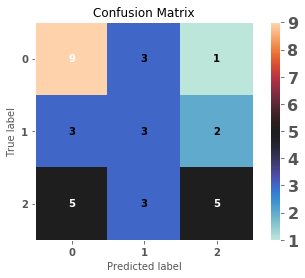

In [142]:
skplt.metrics.plot_confusion_matrix(y_valid,predictions,cmap='icefire',normalize=False)

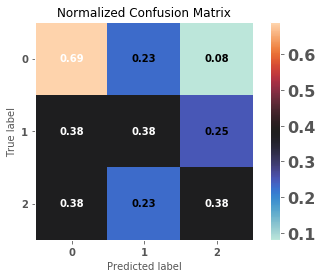

In [143]:
skplt.metrics.plot_confusion_matrix(y_valid,predictions,cmap='icefire',normalize=True)

In [144]:
clf.best_score

defaultdict(dict, {'valid_0': {'multi_logloss': 1.0986126338992328}})

In [145]:
def multi_class_roc(class_code):

    return roc_auc_score(np.where(y_valid==class_code, 1,0), 
                  [val[class_code] for val in clf.predict(x_valid)])

print('roc auc score local = {0:5.5f}'.format(multi_class_roc(0)))
print('roc auc score visitante = {0:5.5f}'.format(multi_class_roc(1)))
print('roc auc score empate = {0:5.5f}'.format(multi_class_roc(2)))
print('promedio roc auc score = {0:5.5f}'.format(np.mean([multi_class_roc(0),
                                                      multi_class_roc(1),
                                                      multi_class_roc(2)])))

roc auc score local = 0.64103
roc auc score visitante = 0.56250
roc auc score empate = 0.53114
promedio roc auc score = 0.57822


In [146]:
print('accuracy score', round(accuracy_score(y_valid,predictions),4))

accuracy score 0.5


## Interpretacion SE HACE EN VALID

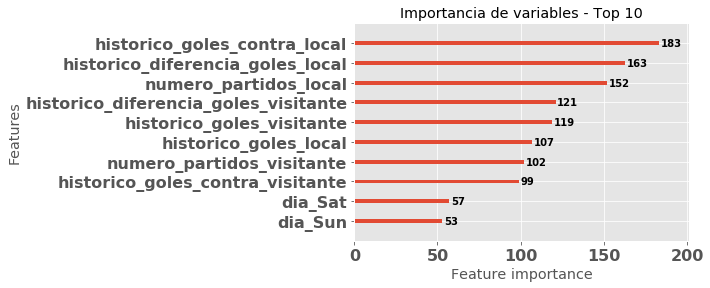

In [147]:
lgb.plot_importance(clf,max_num_features=10, title='Importancia de variables - Top 10')

In [148]:
f_imp = []
for i in zip(x_valid.columns,clf.feature_importance()):
    f_imp.append(i)
    
importancia = pd.DataFrame(f_imp,columns=['col','value_imp']).sort_values(by='value_imp',ascending=False)
importancia = importancia.head(10)

In [149]:
pd.DataFrame(f_imp,columns=['col','value_imp']).sort_values(by='value_imp',ascending=False)

col  value_imp
6                historico_goles_contra_local        183
8            historico_diferencia_goles_local        163
0                       numero_partidos_local        152
9        historico_diferencia_goles_visitante        121
5                   historico_goles_visitante        119
4                       historico_goles_local        107
1                   numero_partidos_visitante        102
7            historico_goles_contra_visitante         99
12                                    dia_Sat         57
13                                    dia_Sun         53
3          historico_racha_ganadora_visitante         51
55       equipo_visitante_Deportivo Toluca FC         29
19                                    mes_Feb         27
20                                    mes_Jan         26
61  equipo_visitante_Tiburones Rojos Veracruz         25
59              equipo_visitante_Querétaro FC         22
11                                    dia_Mon         21
41                  equipo_local_Querétaro FC         19
22                                    mes_Mar         19
48              equipo_visitante_Club América         19
38                    equipo_local_Lobos BUAP         18
42                 equipo_local_Santos Laguna         18
16                                    mes_Apr         18
26                                    mes_Sep         18
35                  equipo_local_Club Tijuana         17
40                    equipo_local_Pumas UNAM         16
17                                    mes_Aug         15
46              equipo_visitante_CF Monterrey         15
29                    equipo_local_CF Pachuca         14
23                                    mes_May         14
..                                        ...        ...
36                     equipo_local_Cruz Azul         13
52               equipo_visitante_Club Puebla         12
53              equipo_visitante_Club Tijuana         11
58                equipo_visitante_Pumas UNAM         11
39              equipo_local_Monarcas Morelia         11
31                    equipo_local_Club Atlas         11
62               equipo_visitante_Tigres UANL         11
2              historico_racha_ganadora_local         11
14                                    dia_Thu         11
15                                    dia_Wed         11
47                equipo_visitante_CF Pachuca         10
24                                    mes_Nov         10
49                equipo_visitante_Club Atlas         10
51               equipo_visitante_Club Necaxa         10
32                     equipo_local_Club León         10
27         equipo_local_CD Guadalajara Chivas          9
25                                    mes_Oct          9
33                   equipo_local_Club Necaxa          9
30                  equipo_local_Club América          9
34                   equipo_local_Club Puebla          9
45     equipo_visitante_CD Guadalajara Chivas          8
50                 equipo_visitante_Club León          8
56                equipo_visitante_Lobos BUAP          8
57          equipo_visitante_Monarcas Morelia          8
44                   equipo_local_Tigres UANL          7
28                  equipo_local_CF Monterrey          7
21                                    mes_Jul          6
60             equipo_visitante_Santos Laguna          5
10                                    dia_Fri          4
18                                    mes_Dec          0

[63 rows x 2 columns]

In [150]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_valid)

C extension was not built during install!


In [151]:
shap.initjs()

In [152]:
shap.force_plot(explainer.expected_value[0], shap_values[0], x_valid)

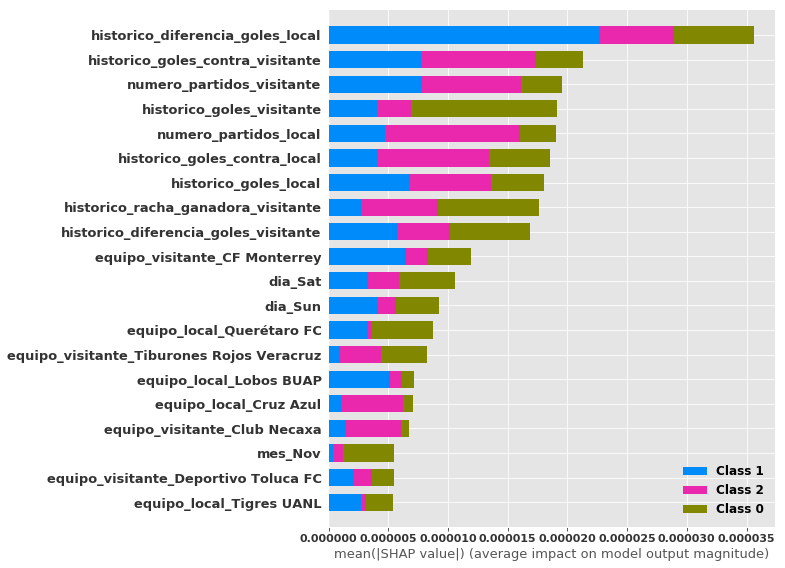

In [153]:
shap.summary_plot(shap_values, x_valid)

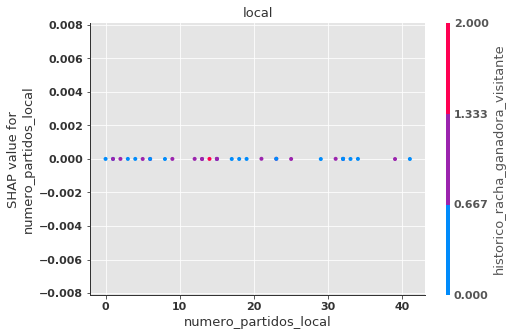

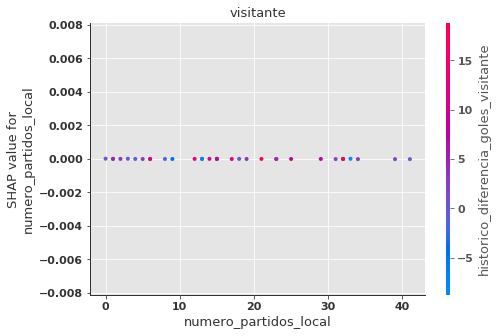

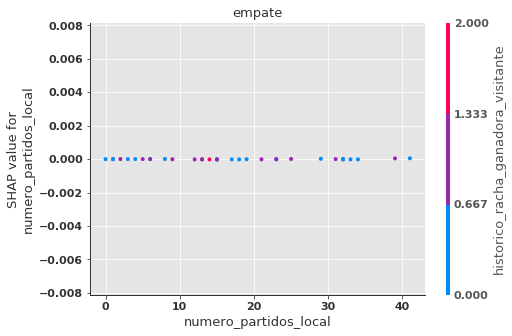

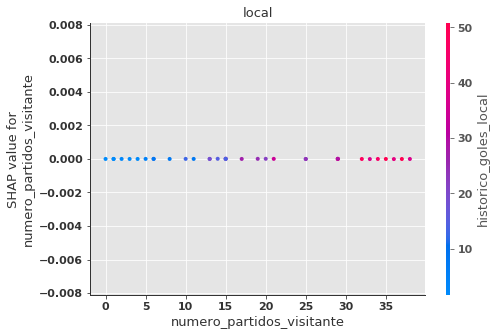

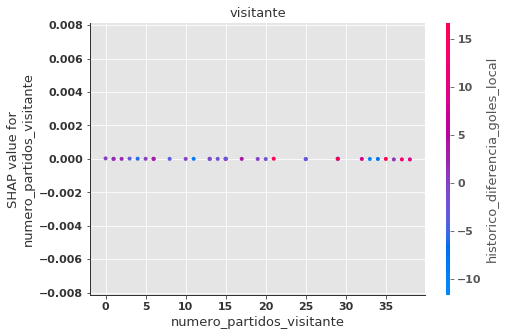

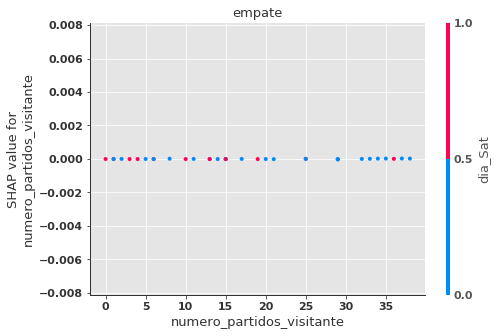

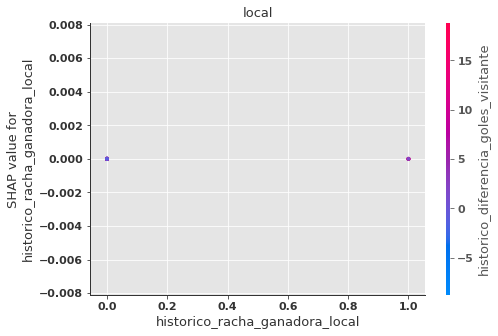

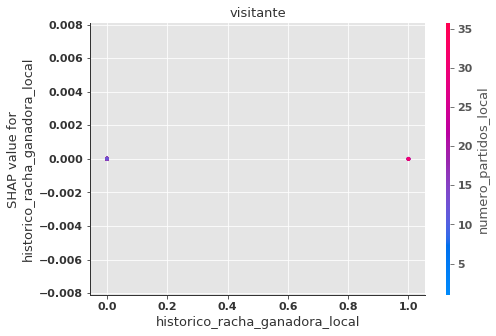

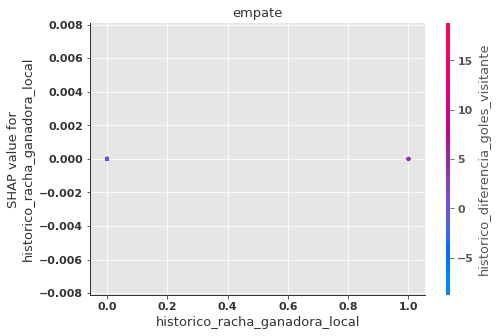

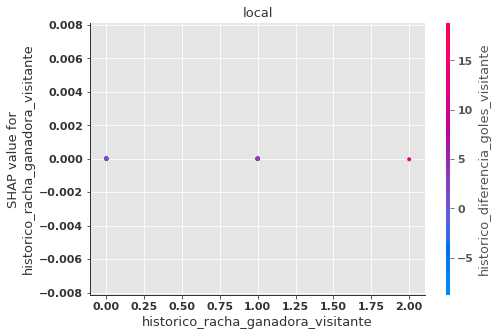

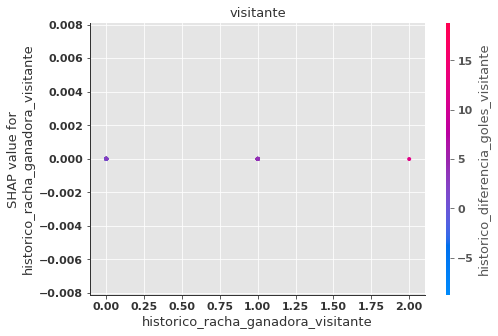

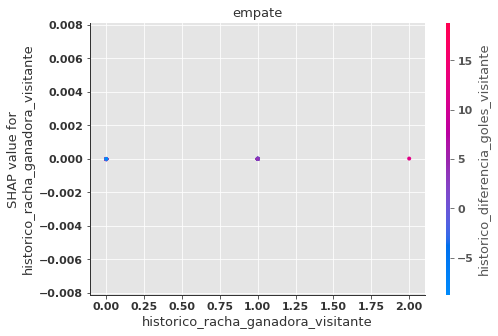

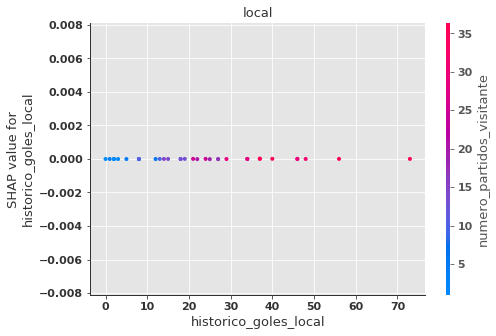

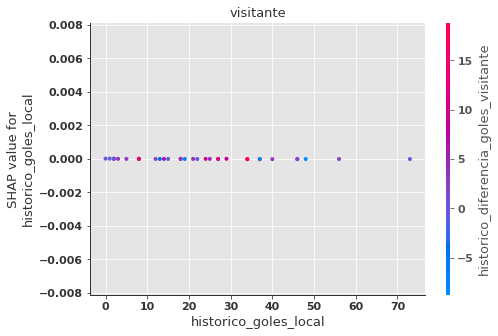

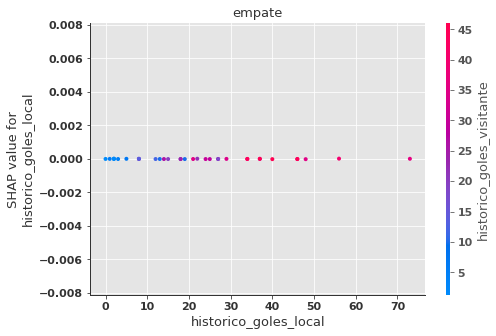

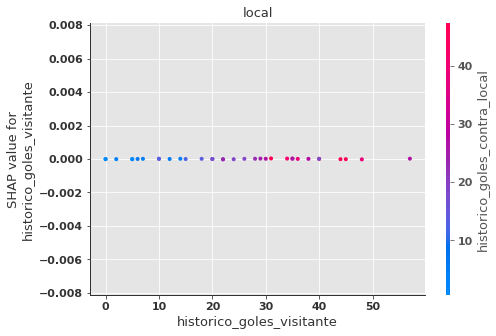

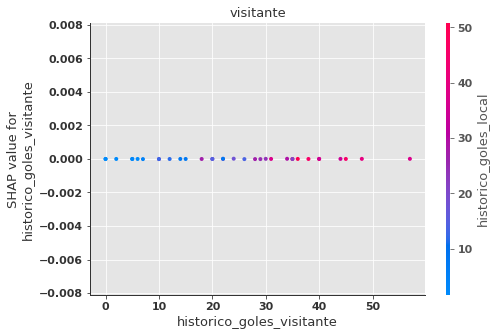

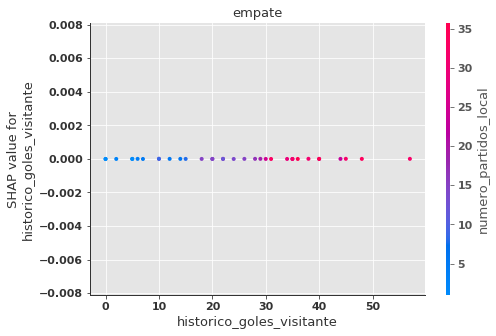

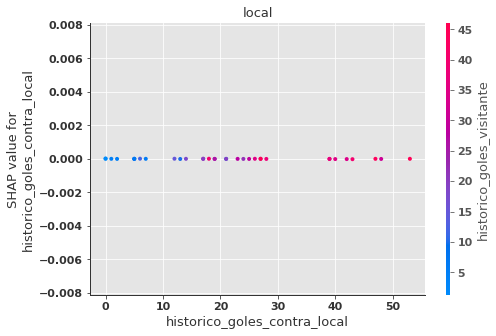

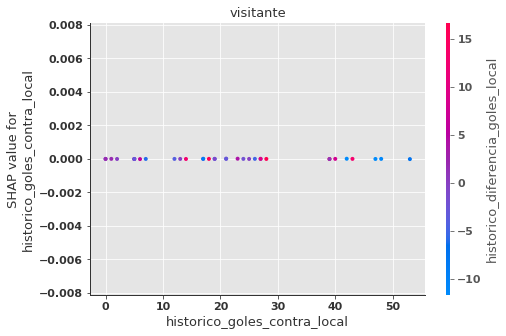

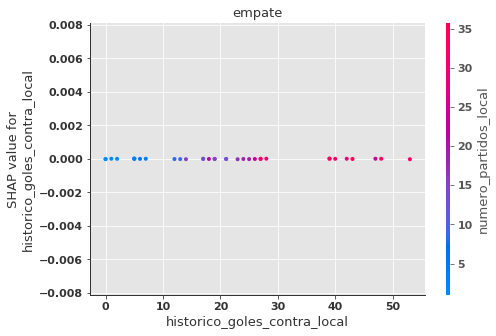

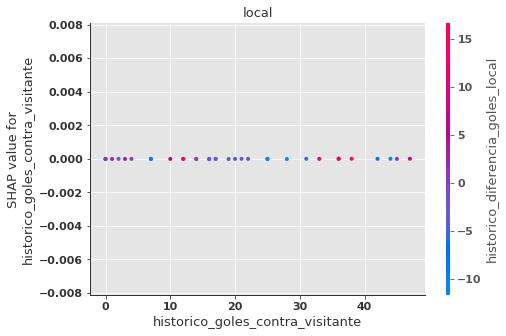

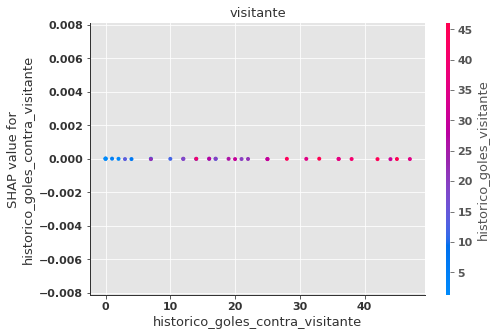

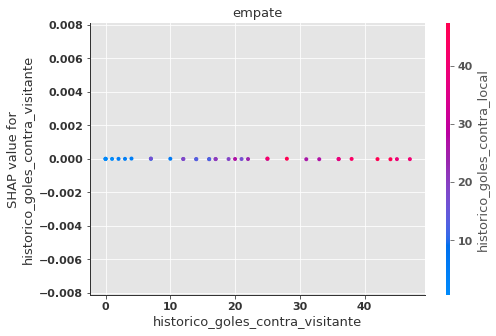

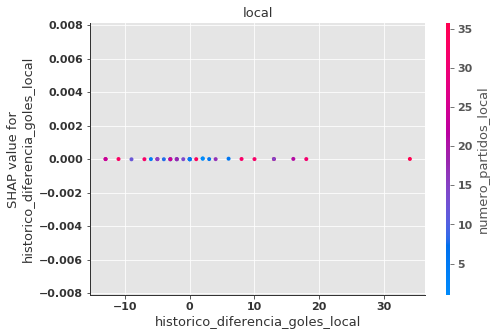

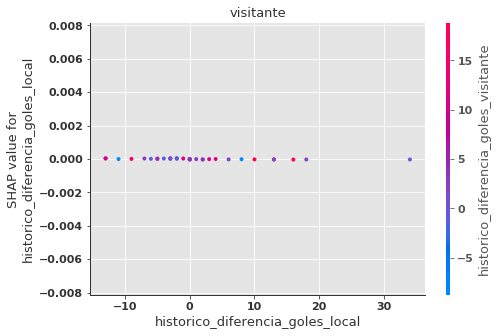

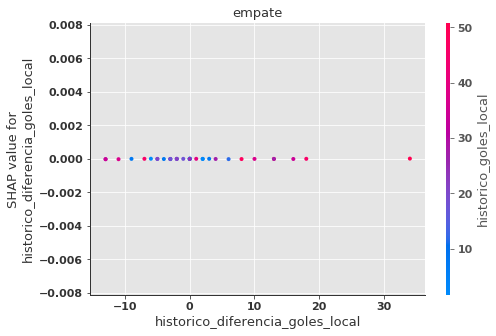

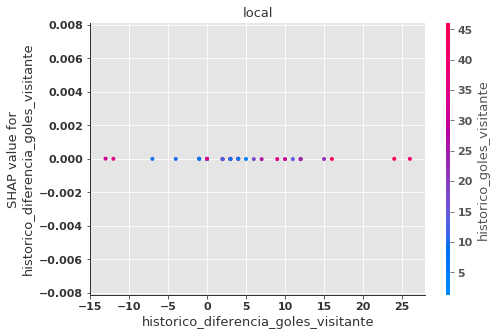

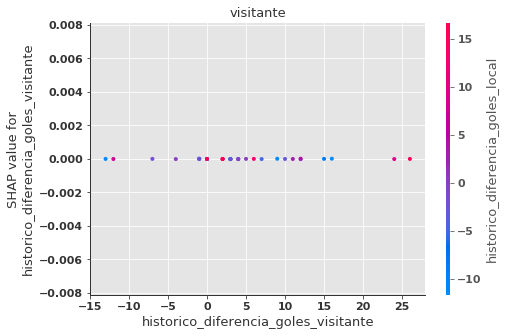

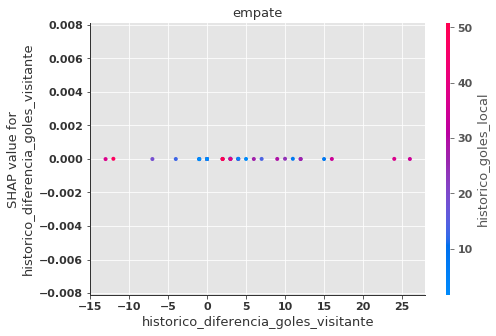

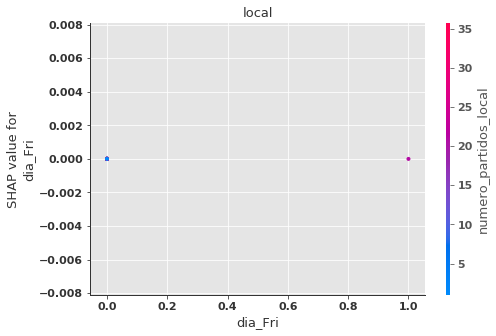

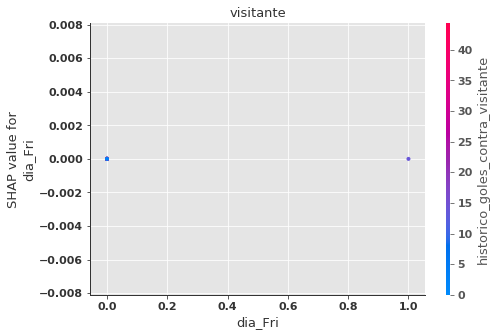

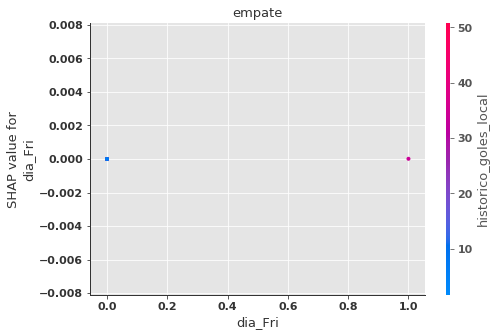

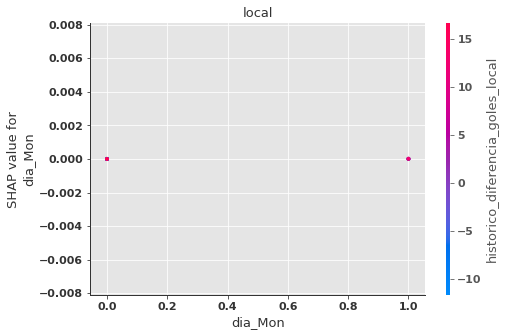

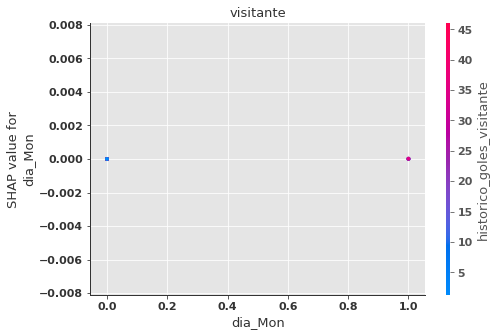

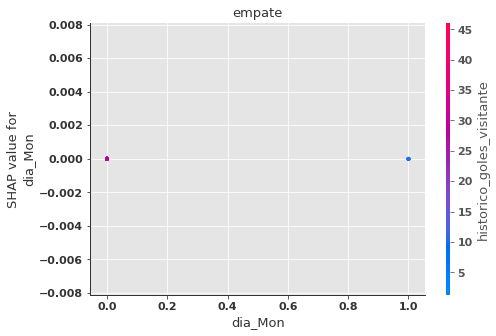

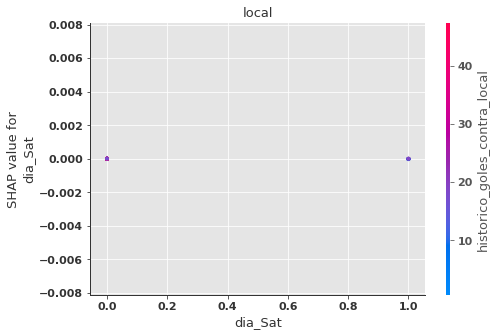

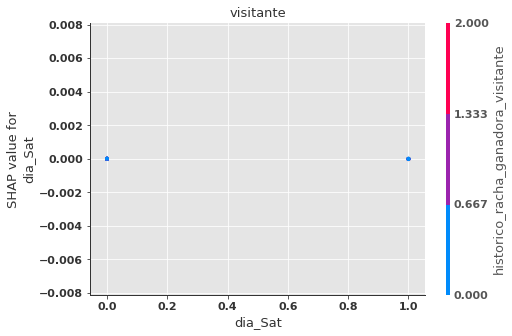

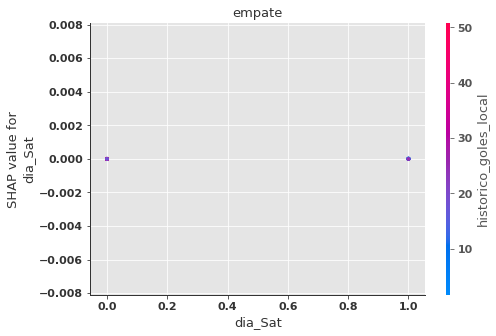

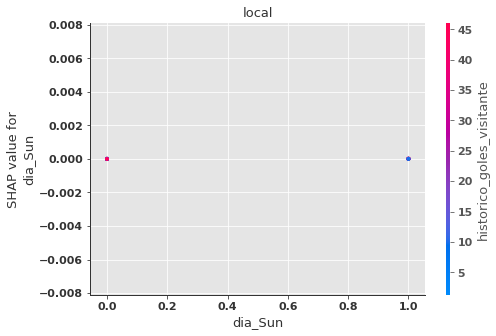

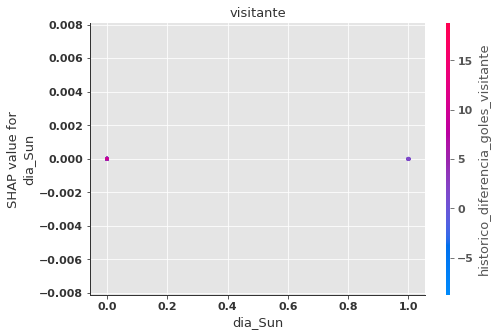

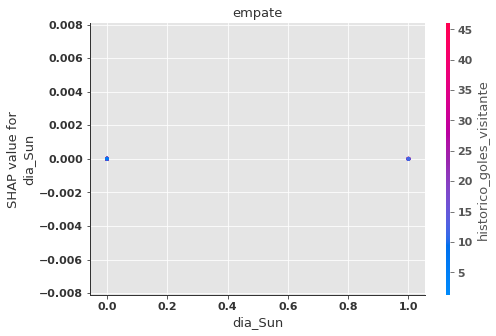

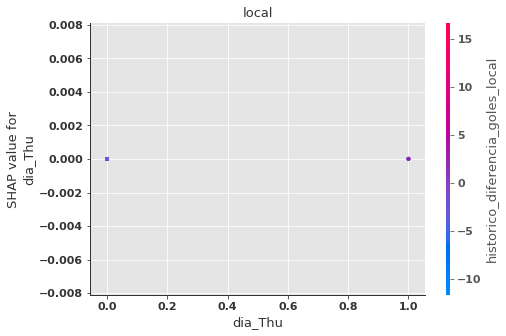

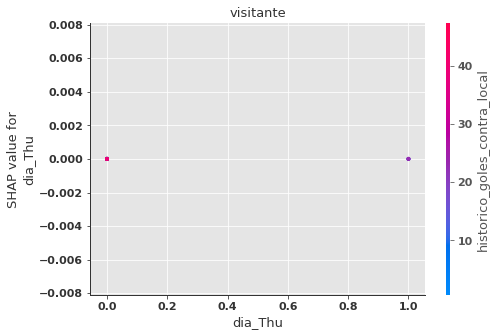

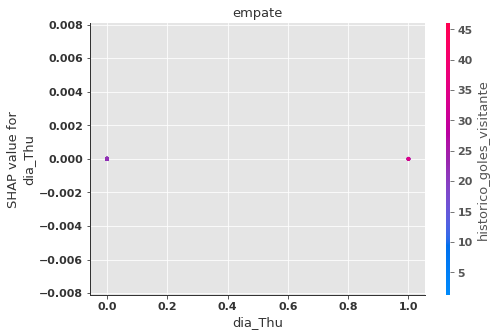

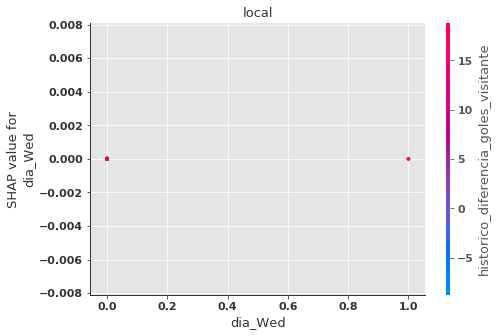

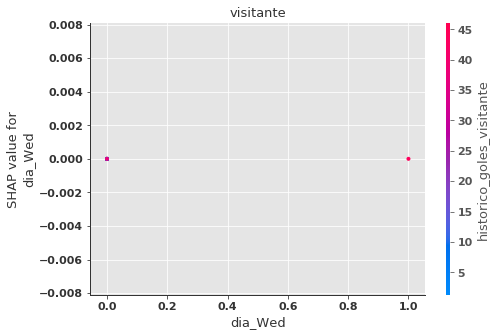

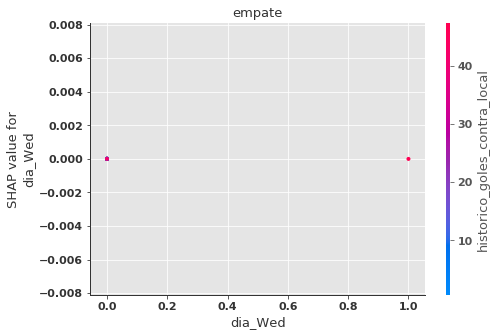

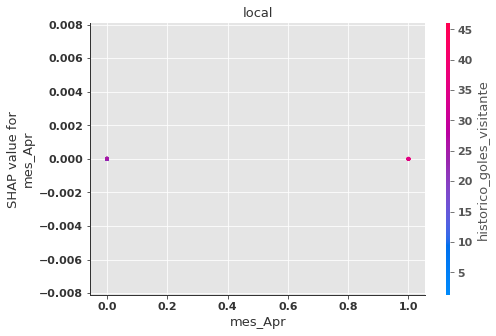

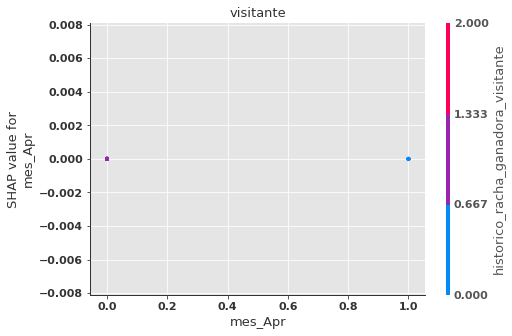

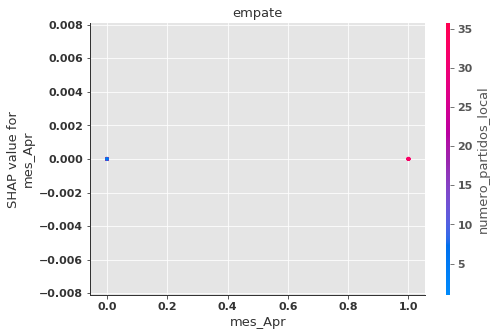

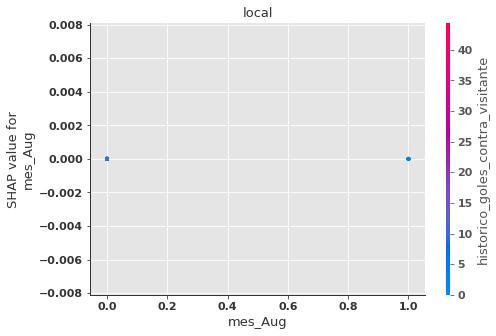

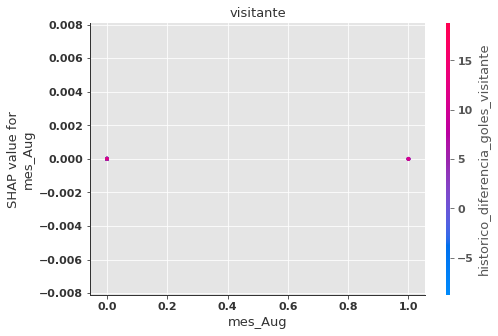

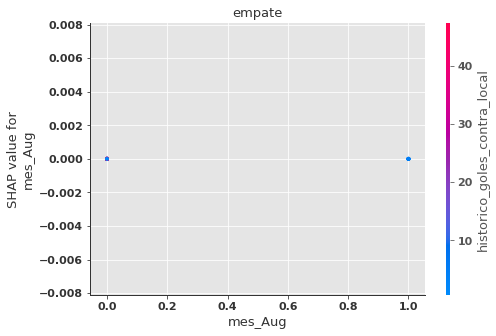

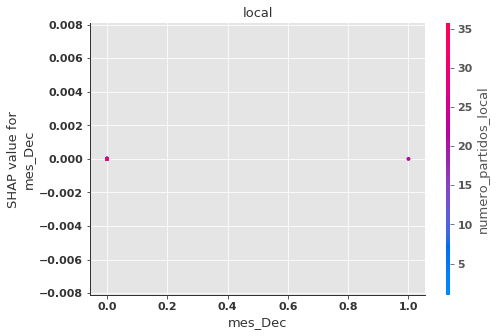

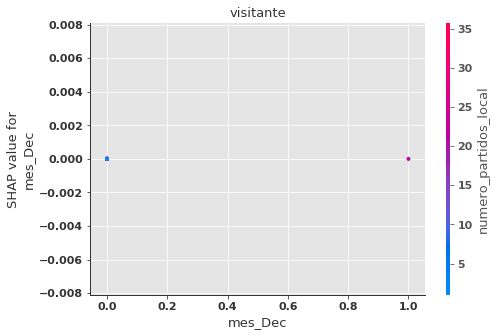

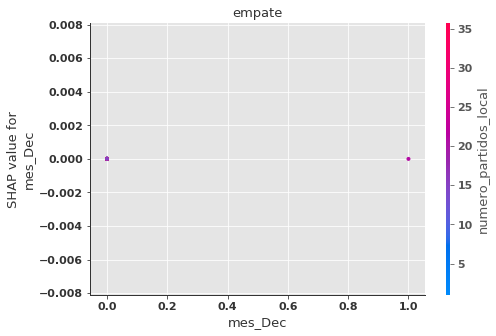

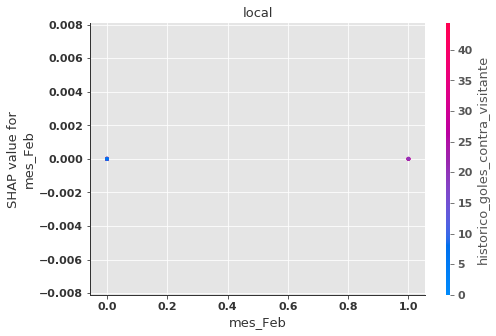

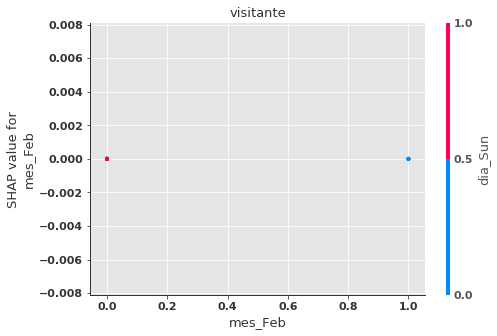

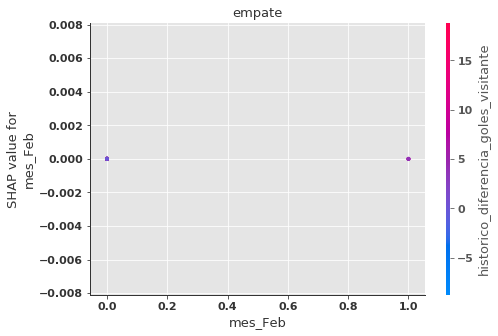

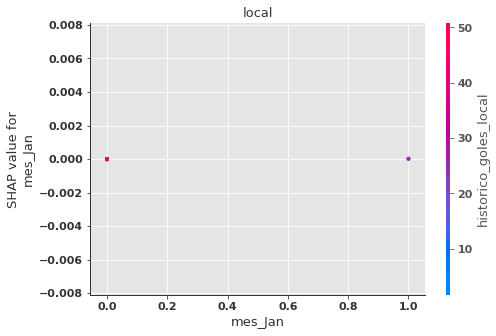

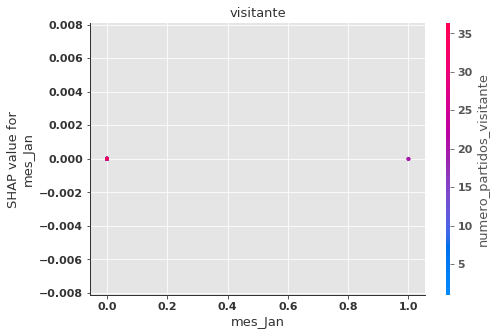

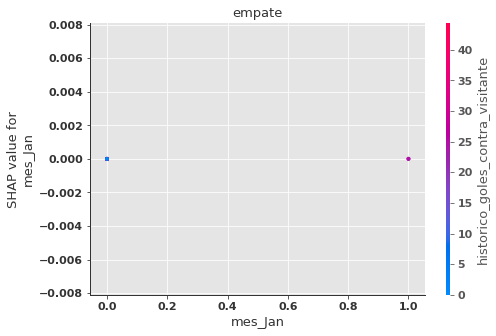

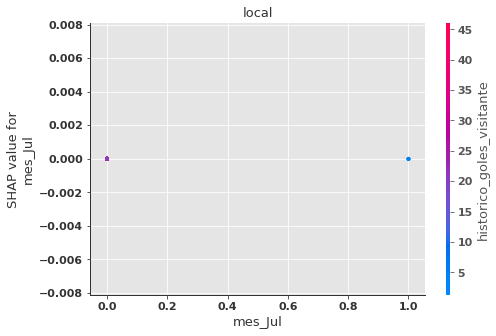

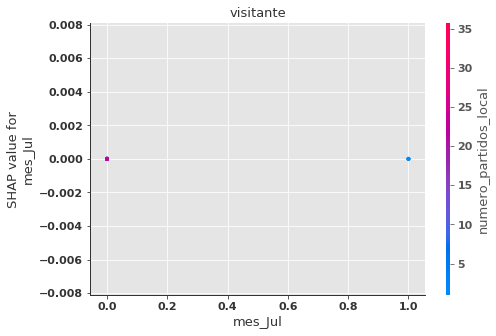

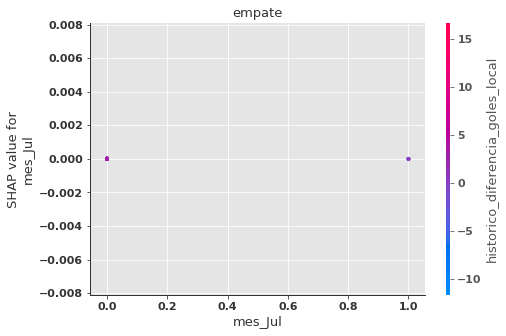

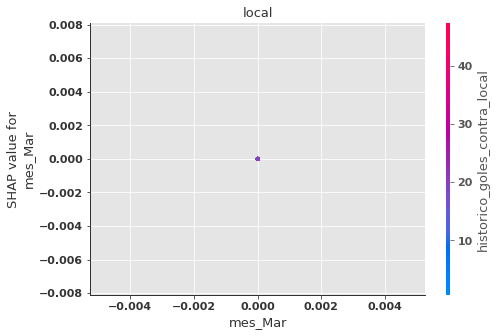

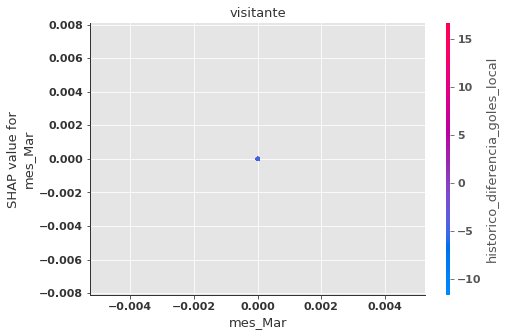

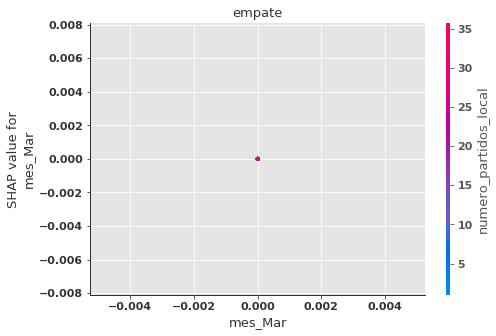

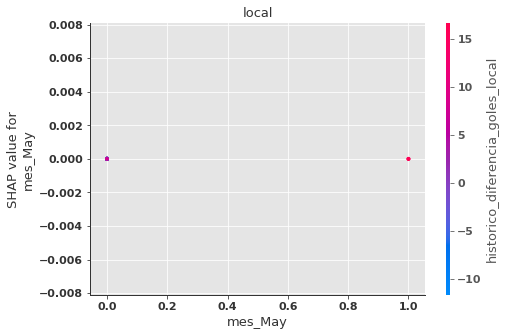

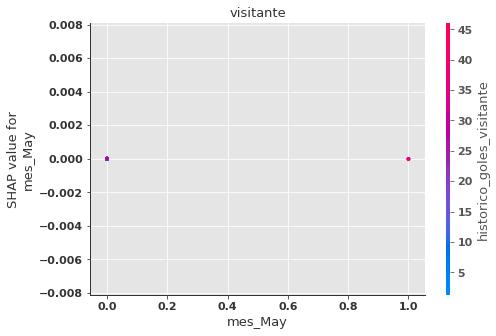

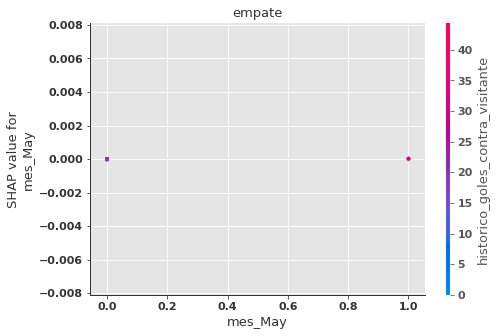

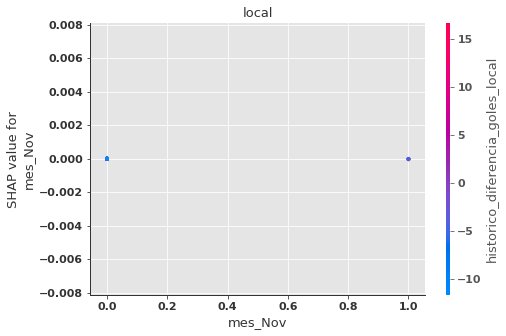

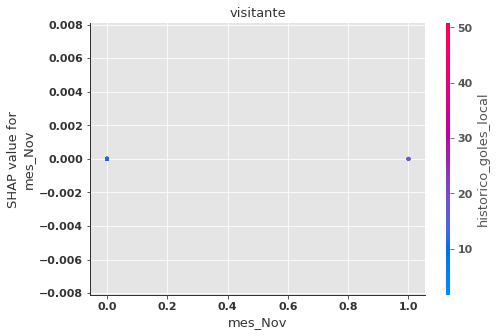

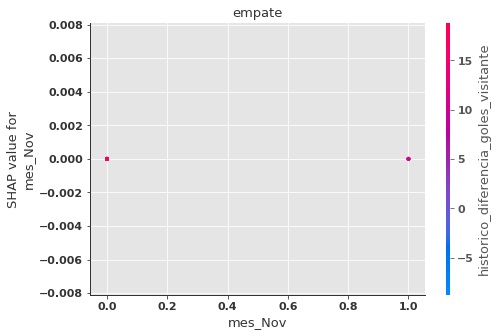

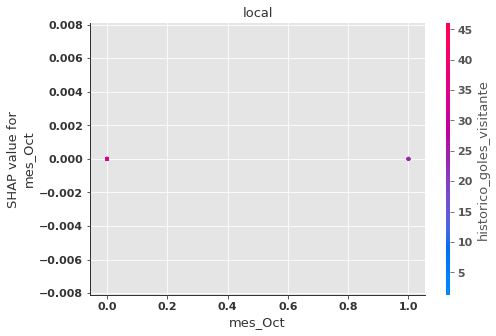

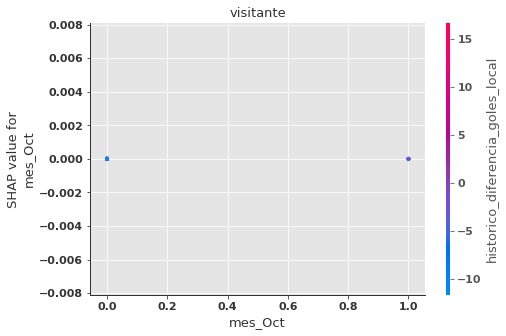

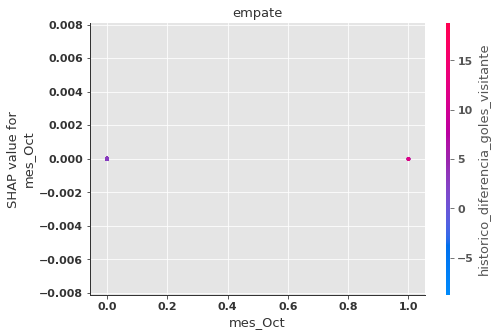

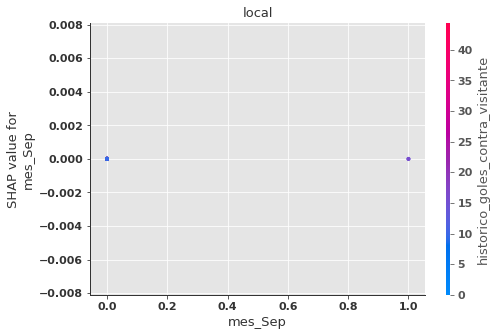

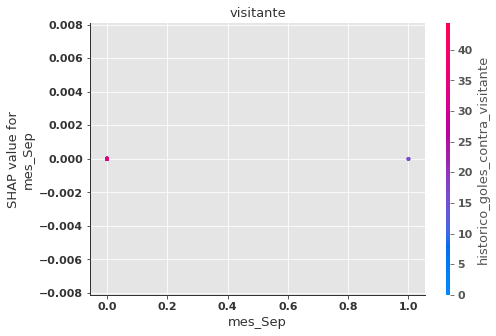

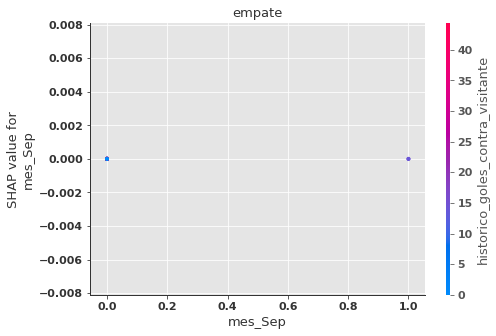

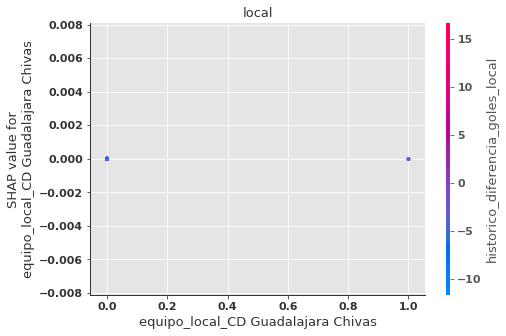

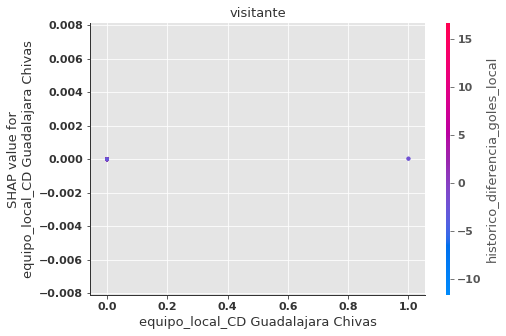

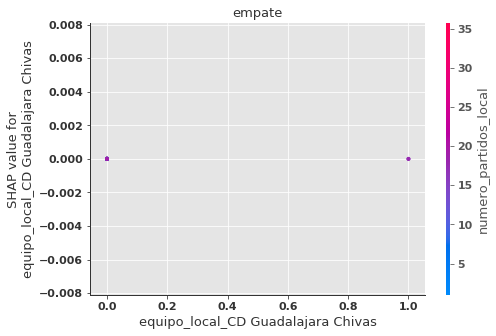

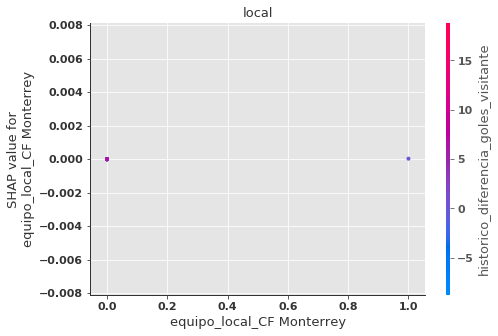

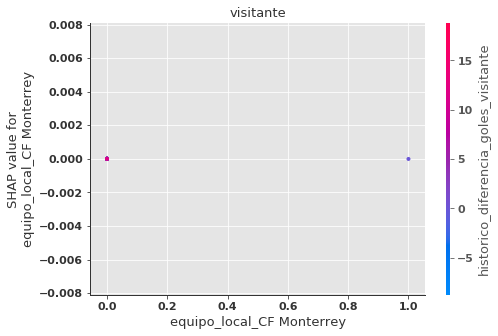

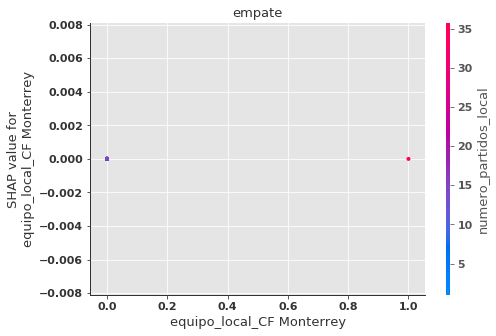

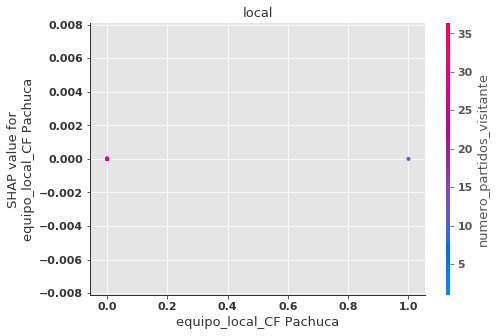

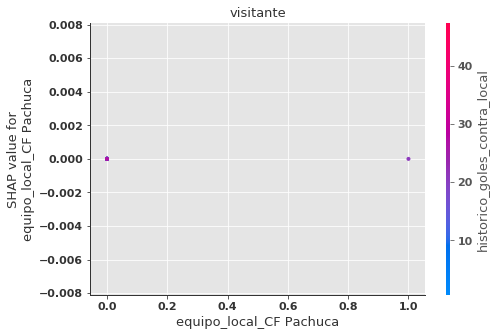

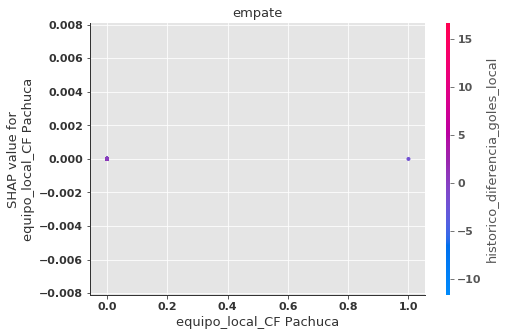

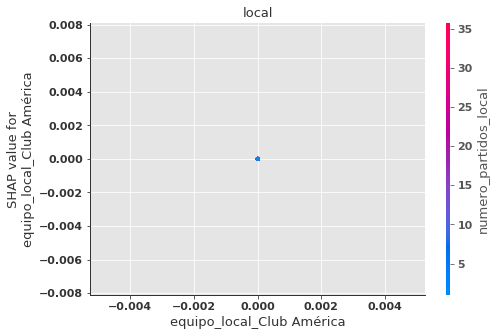

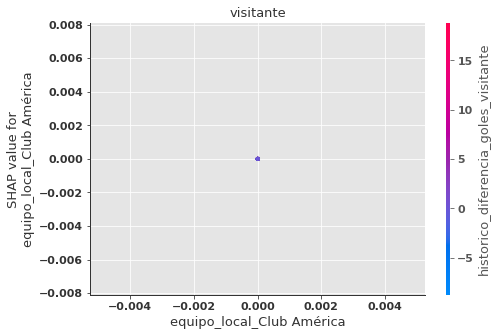

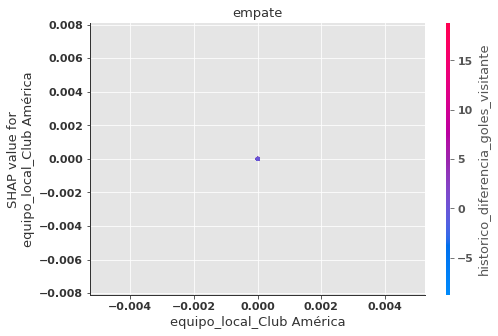

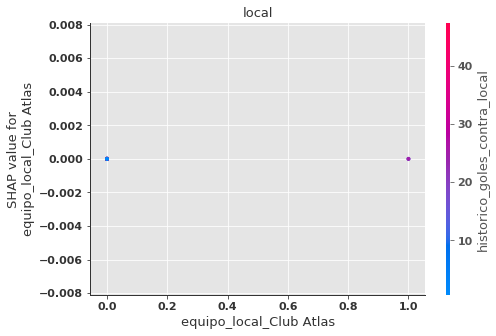

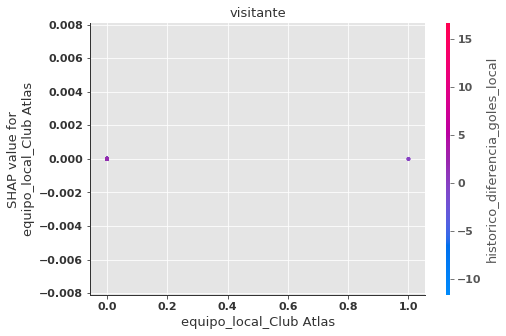

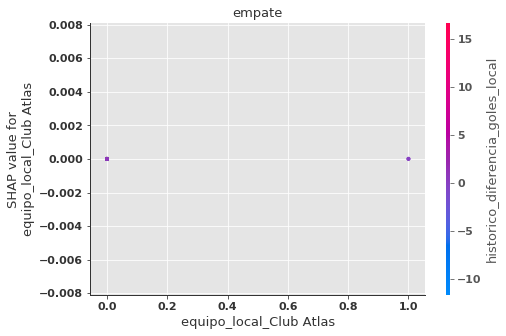

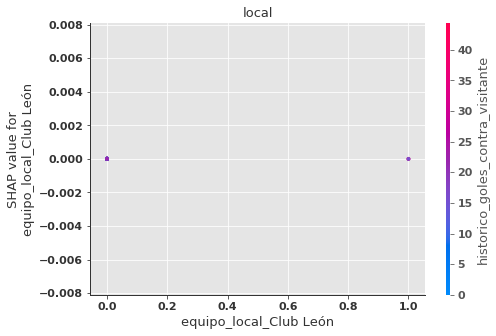

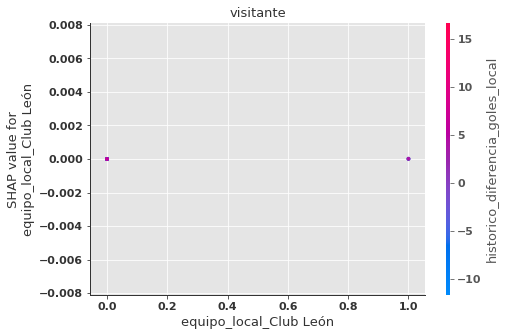

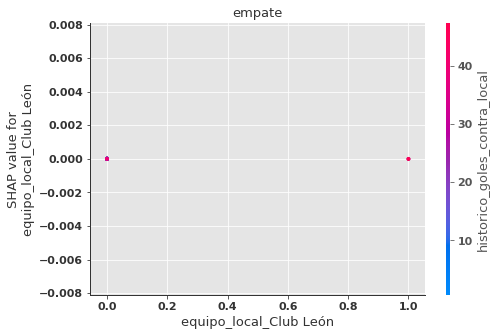

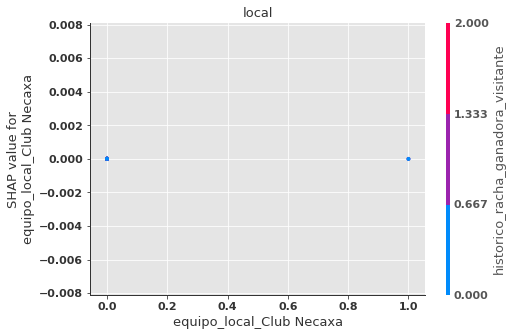

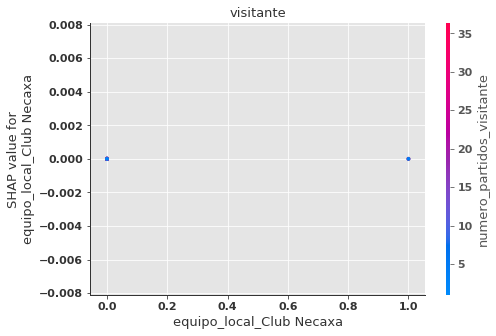

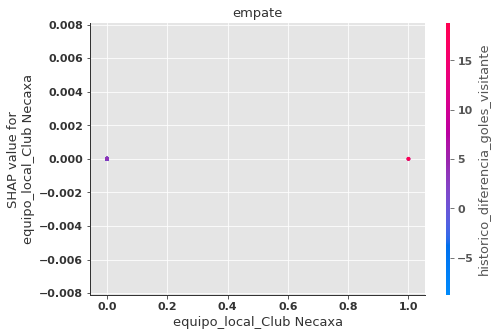

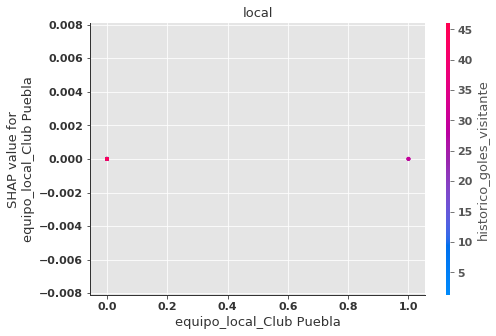

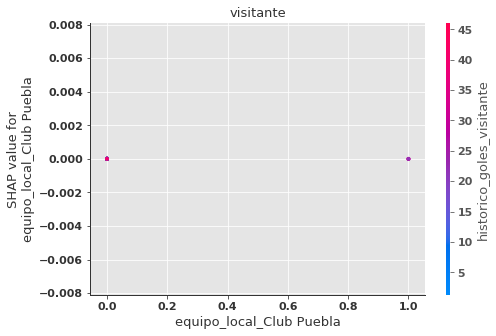

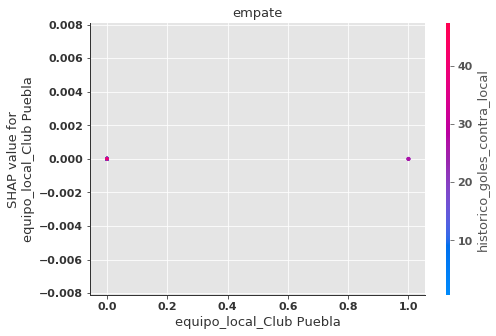

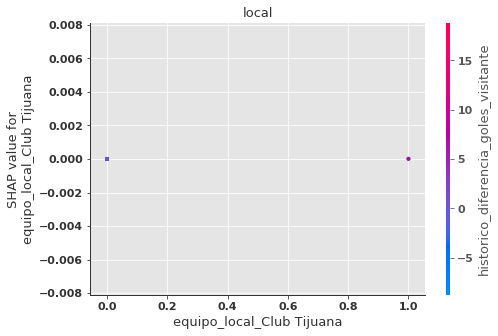

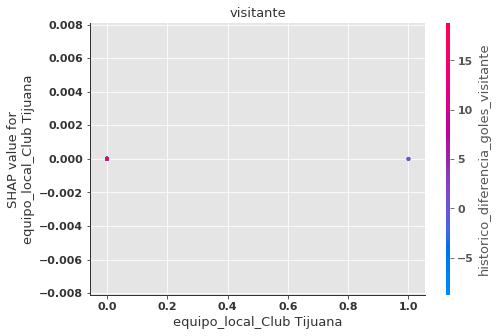

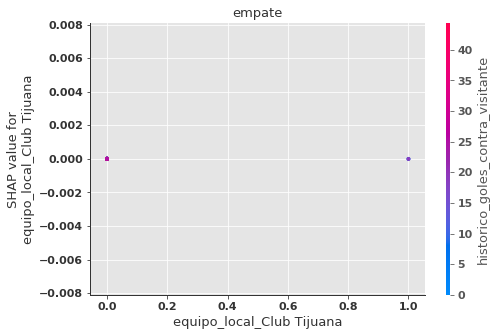

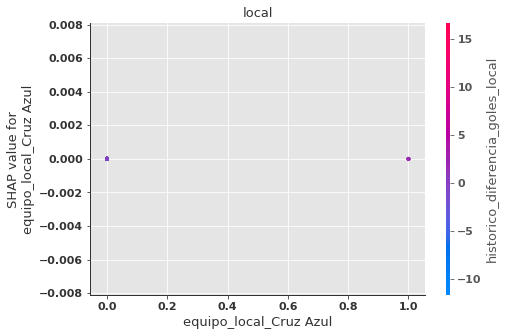

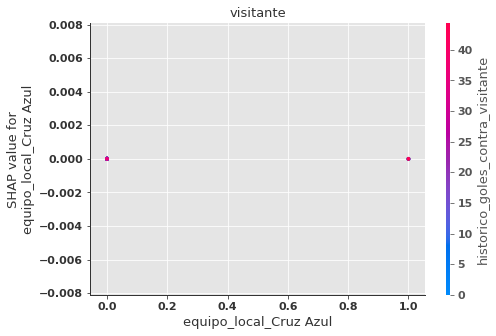

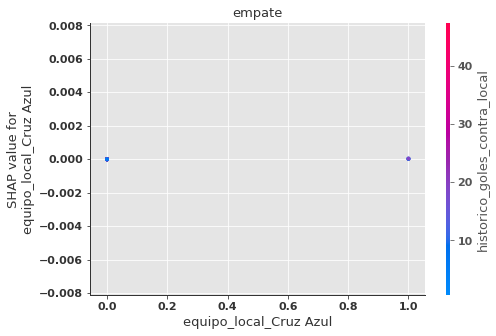

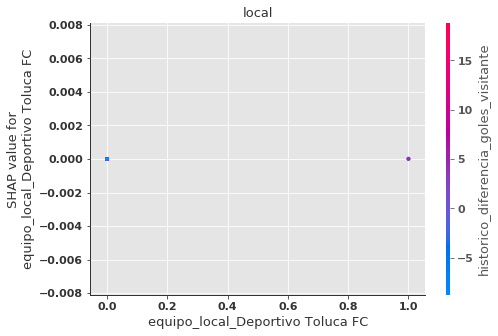

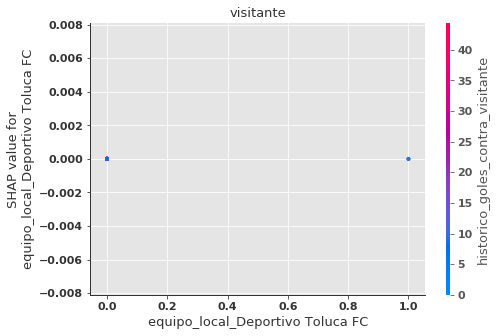

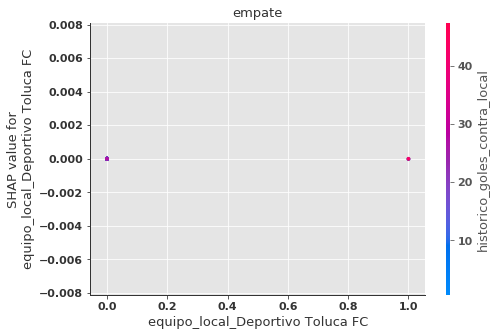

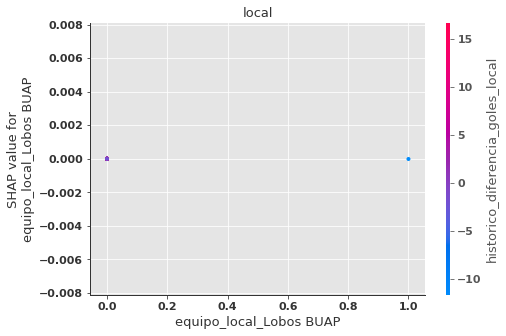

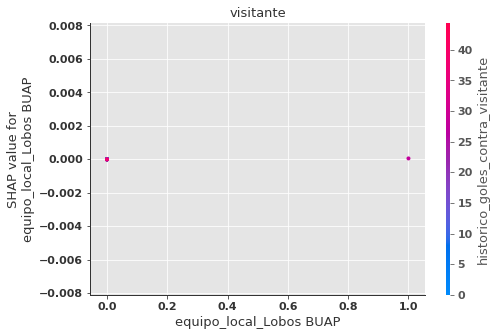

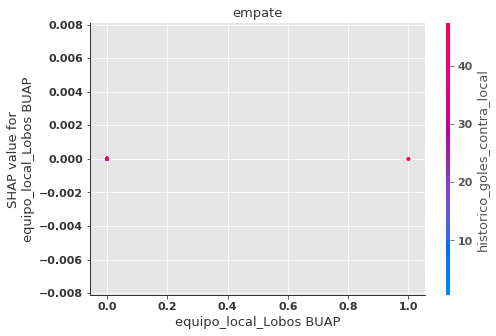

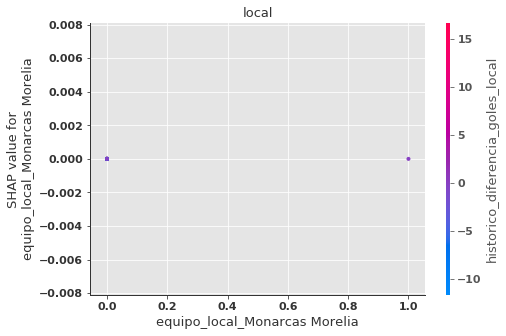

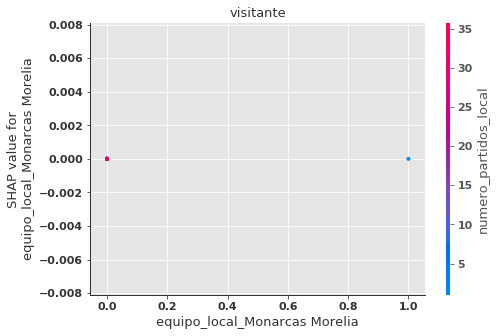

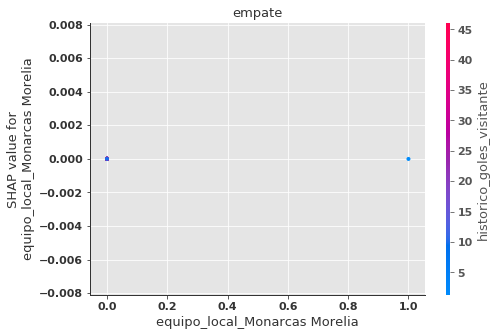

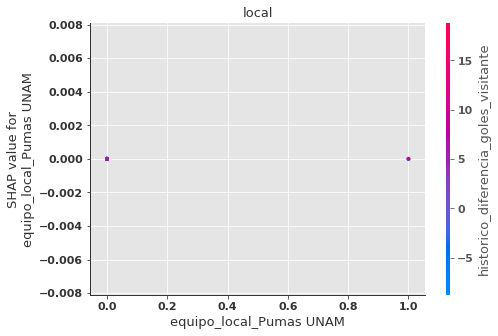

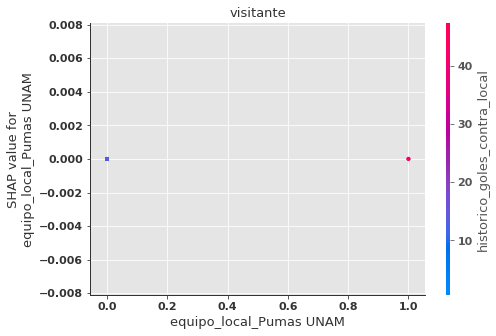

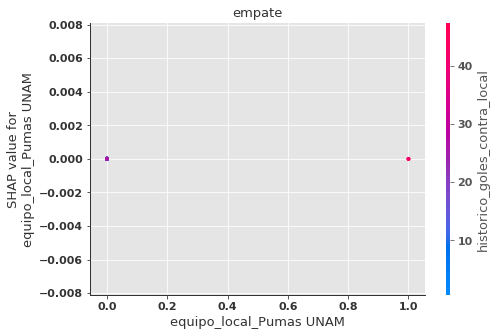

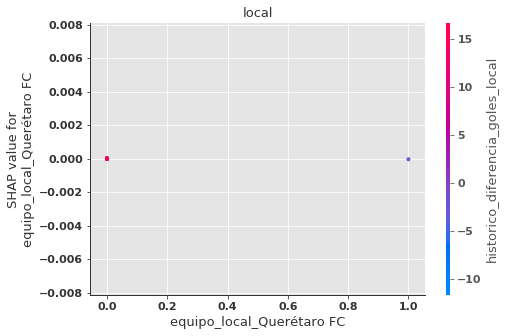

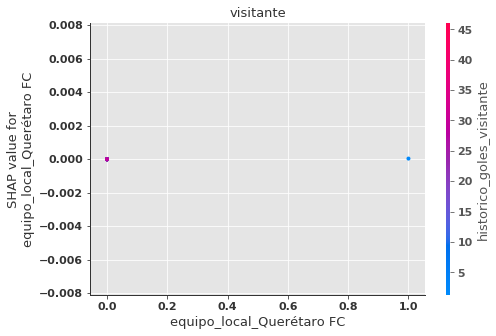

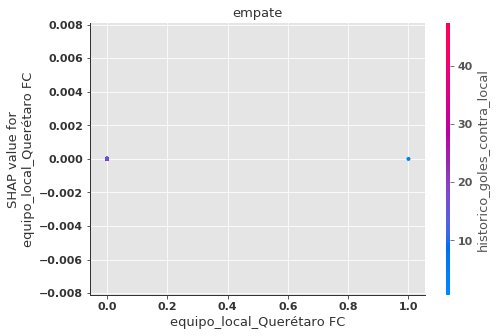

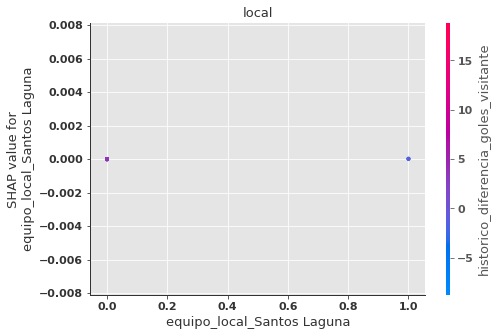

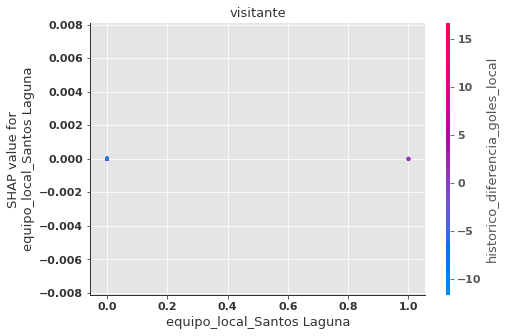

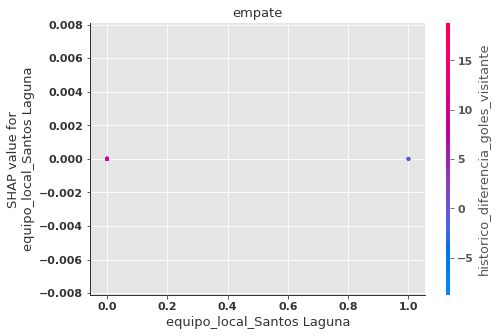

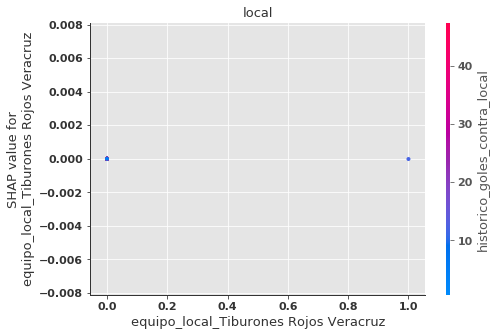

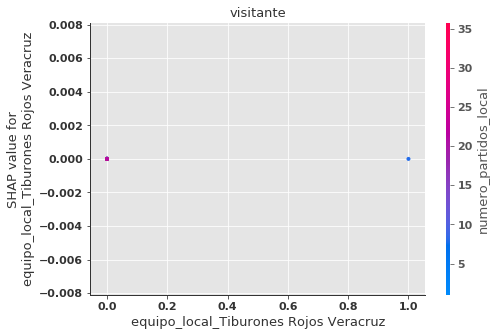

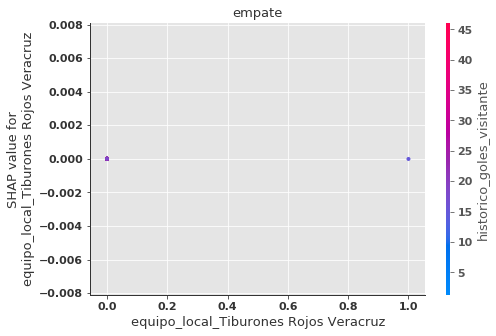

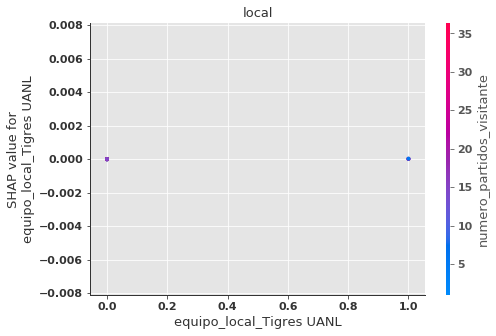

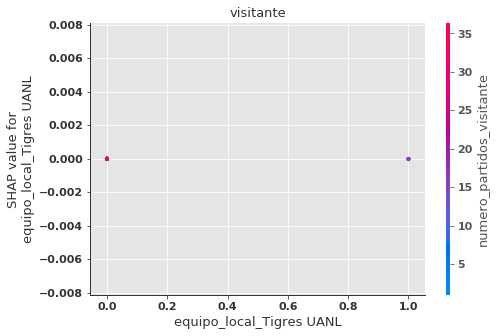

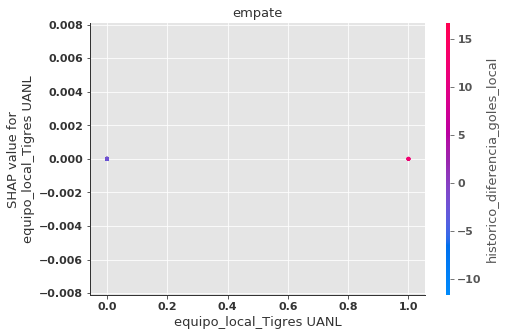

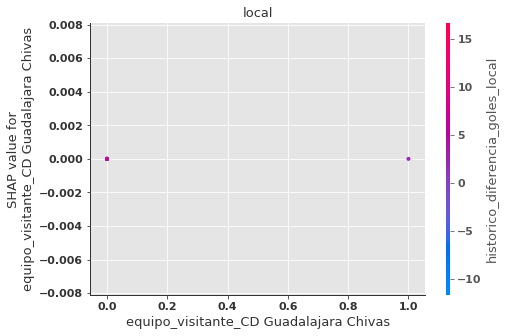

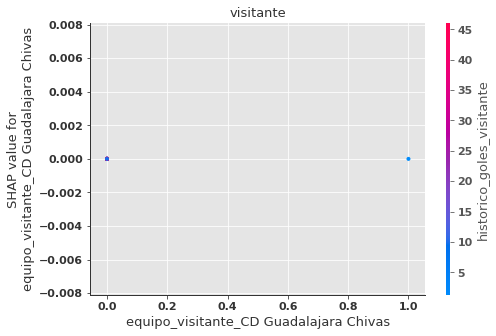

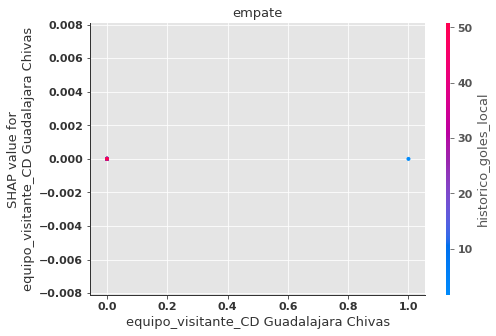

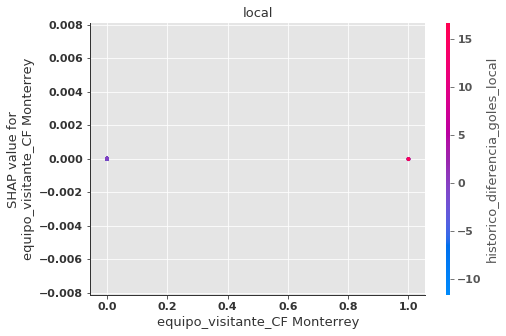

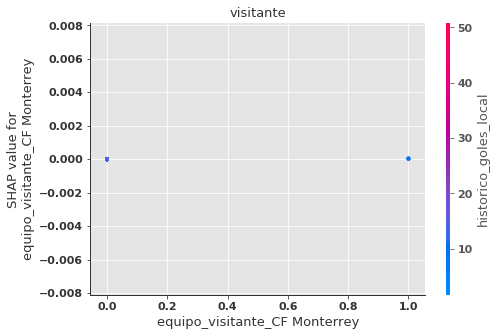

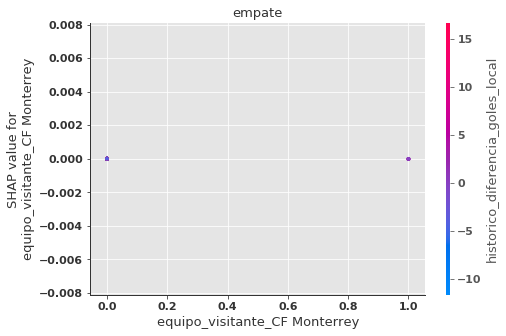

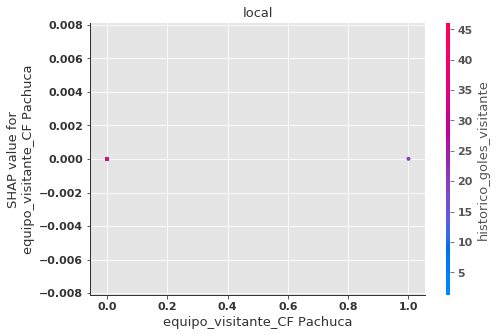

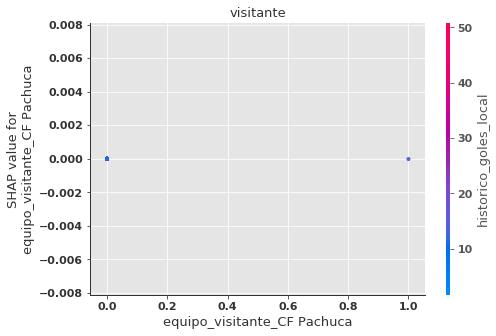

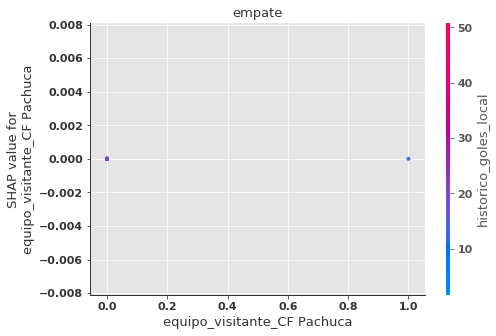

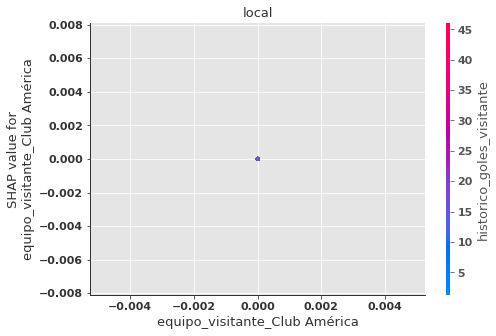

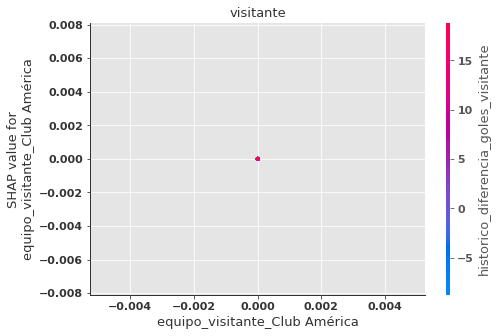

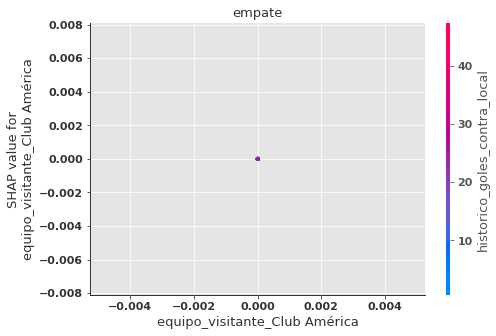

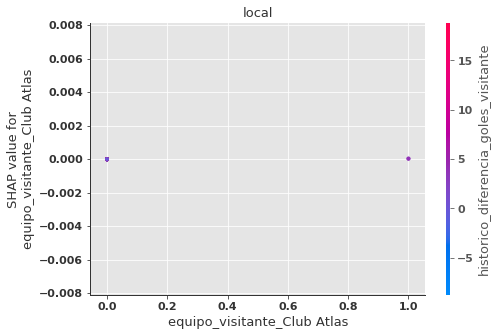

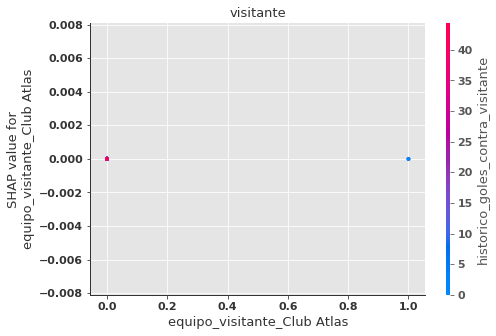

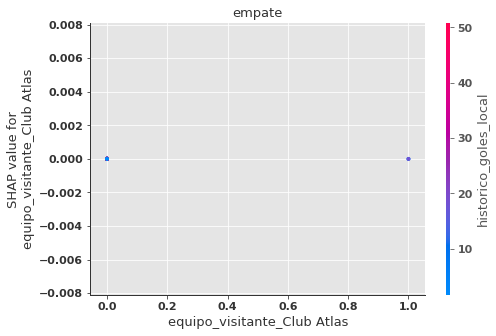

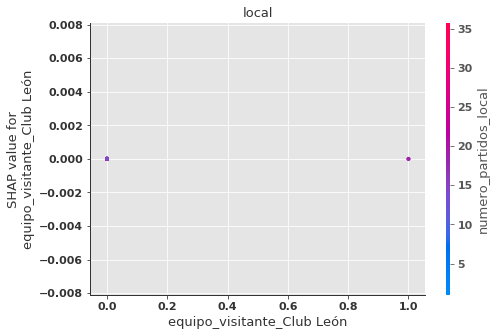

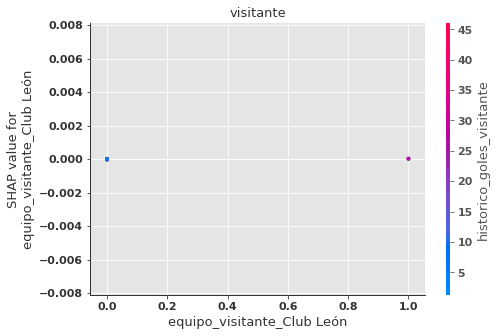

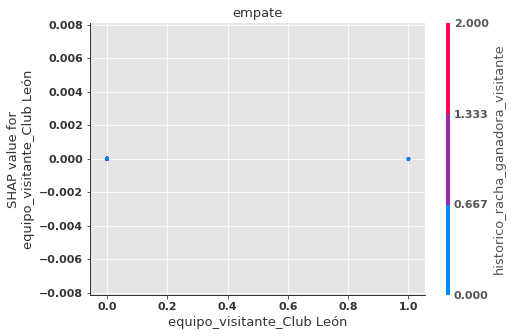

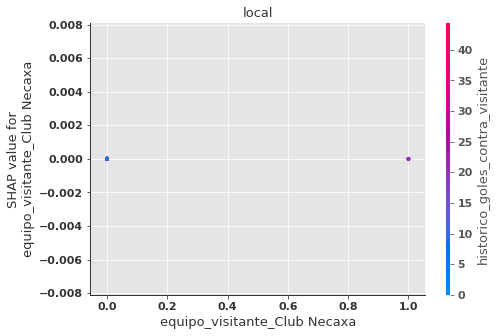

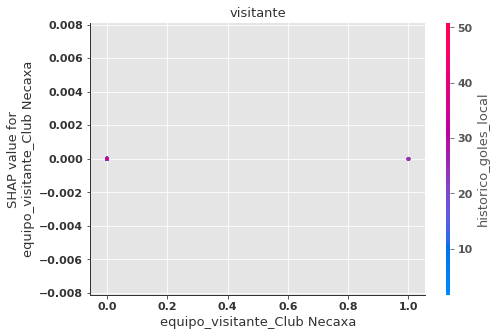

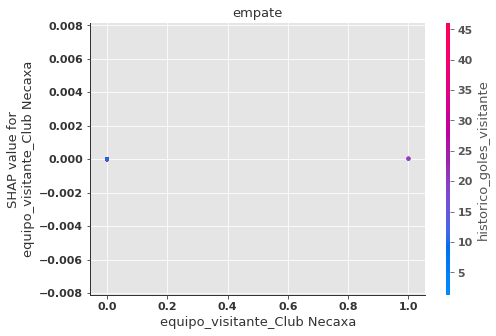

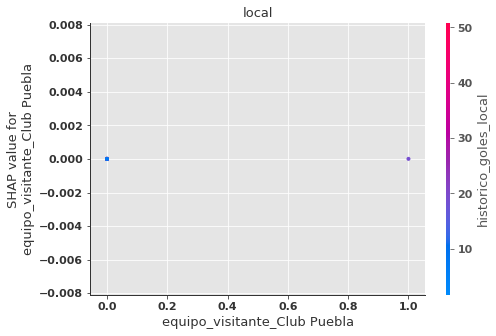

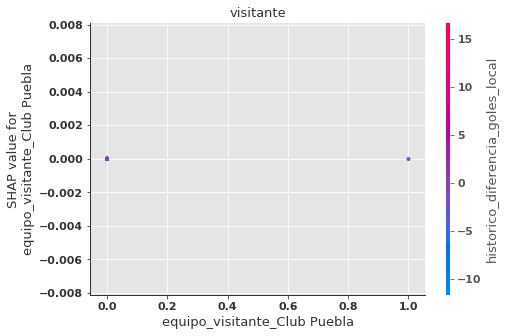

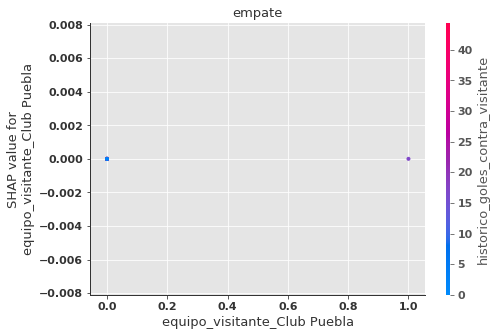

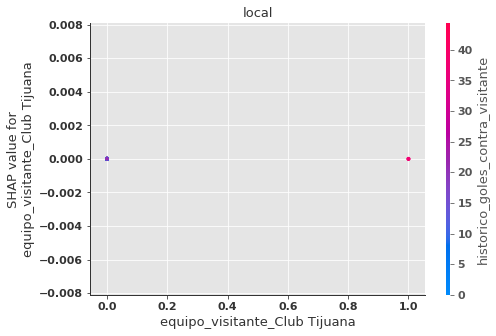

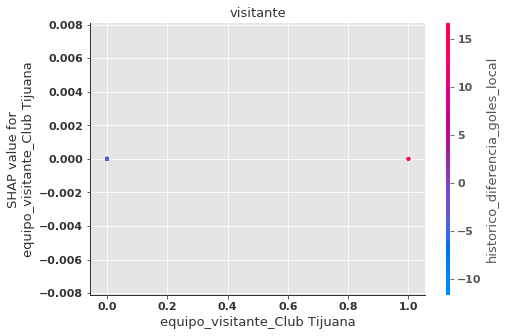

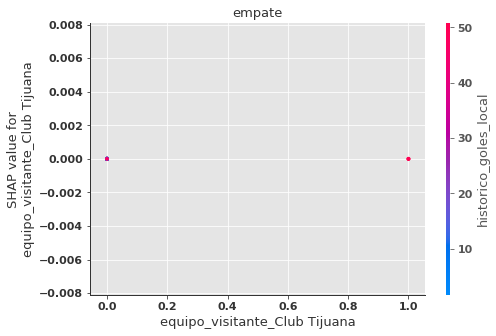

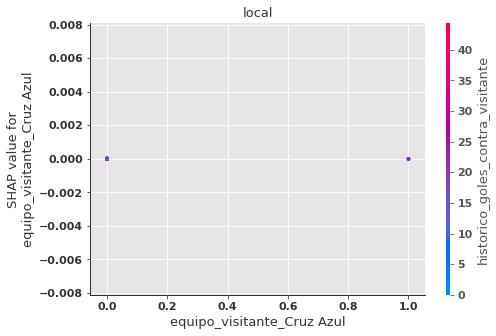

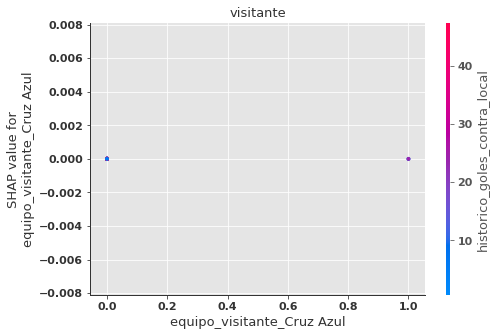

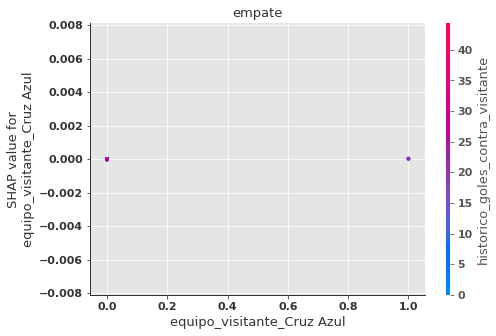

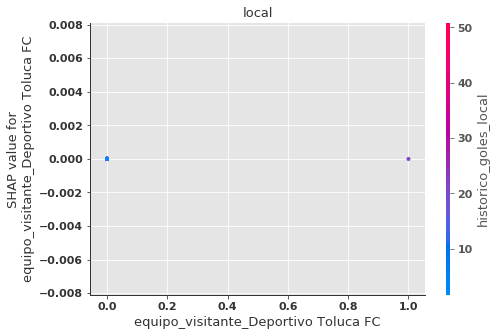

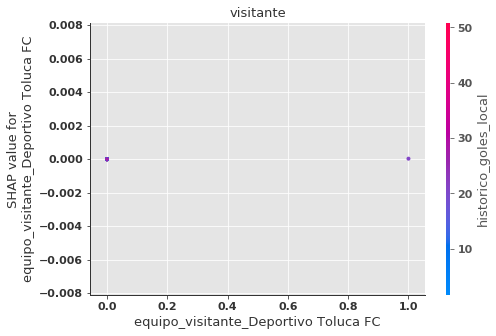

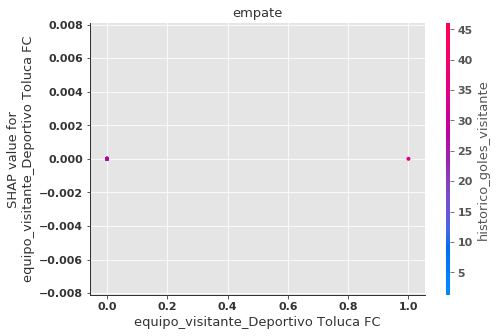

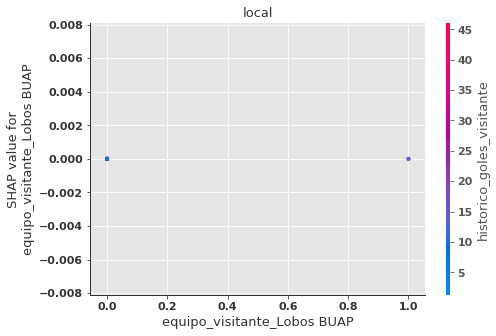

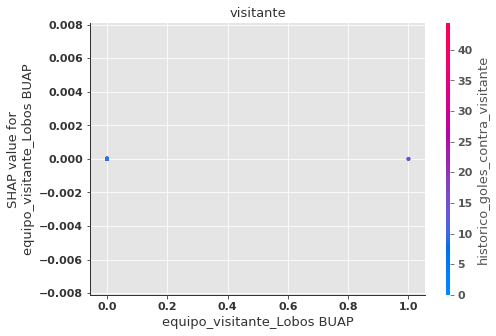

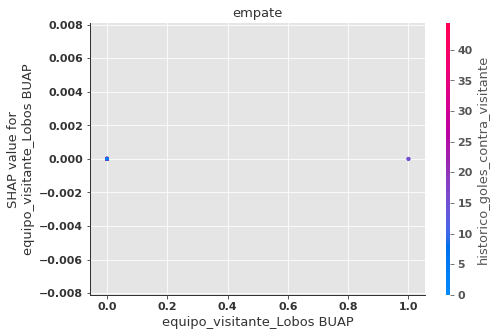

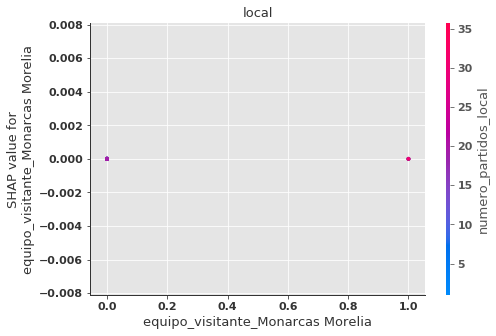

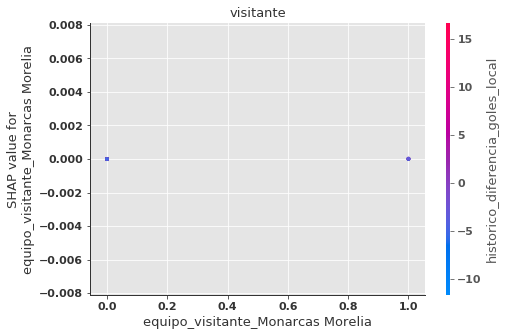

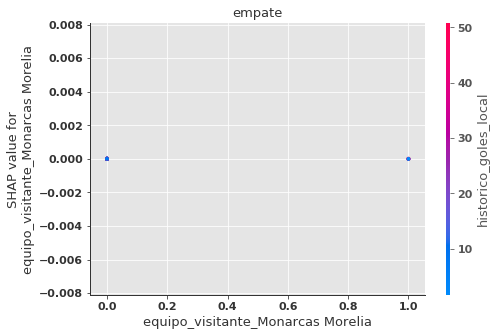

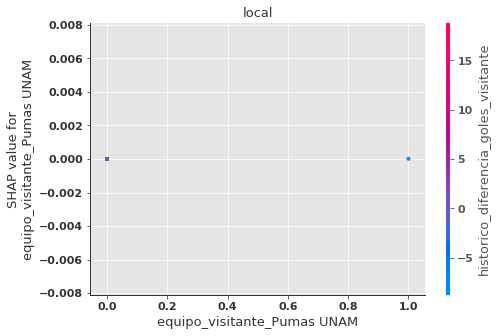

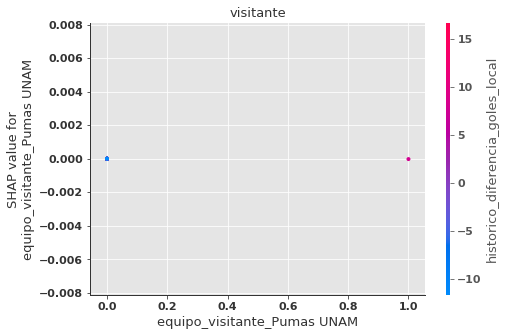

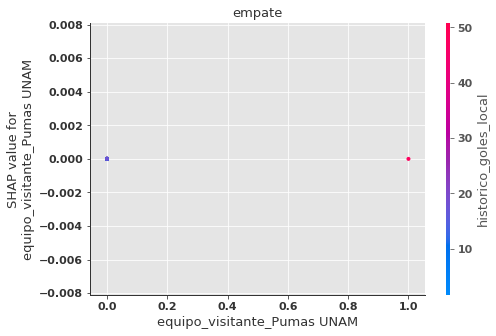

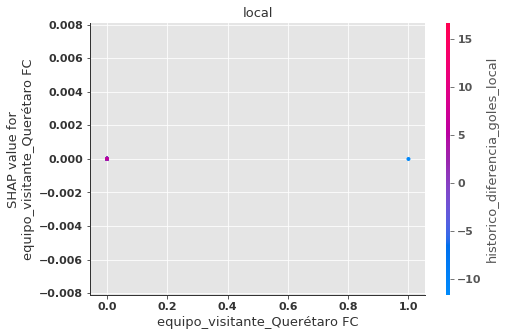

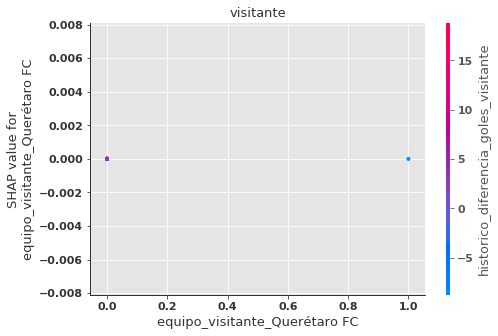

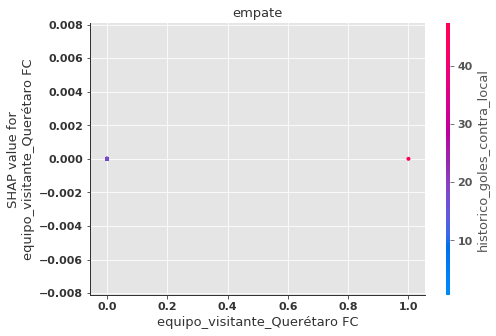

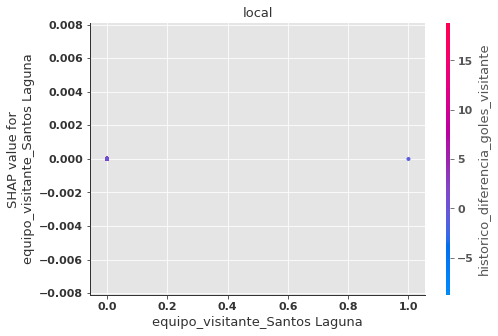

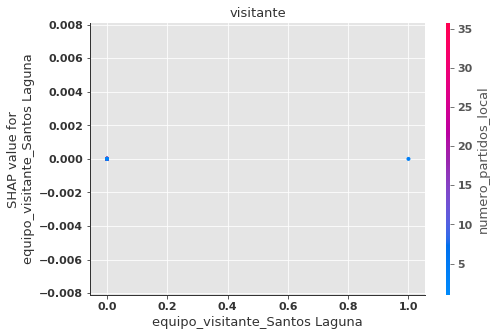

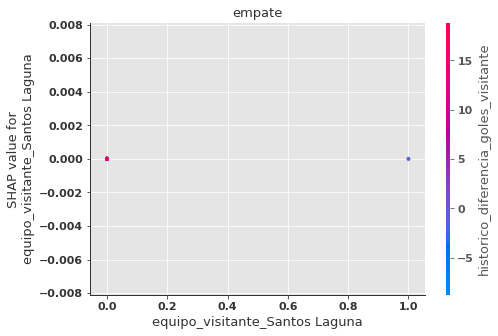

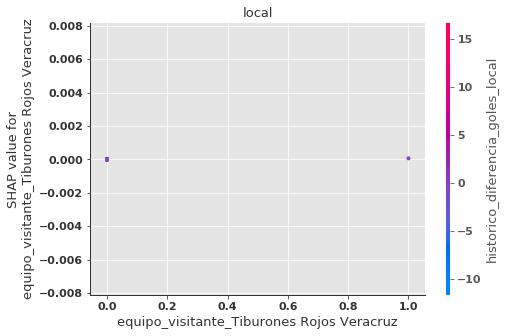

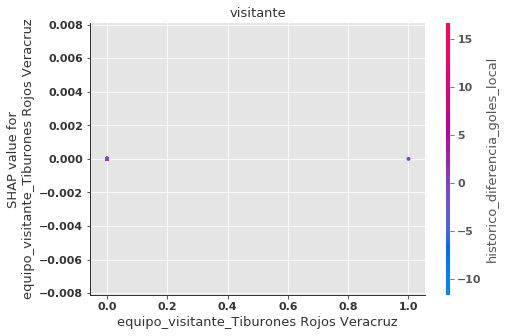

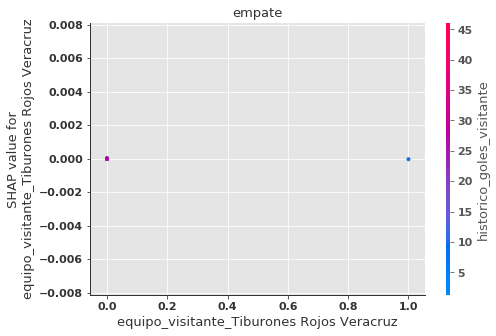

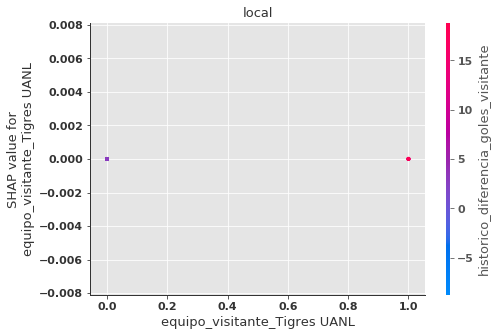

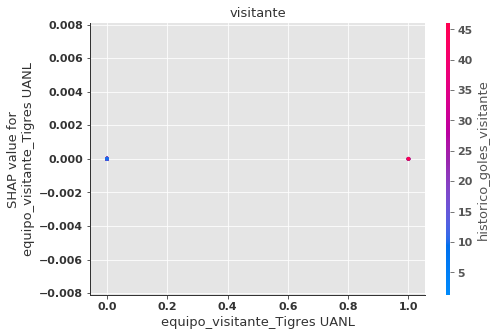

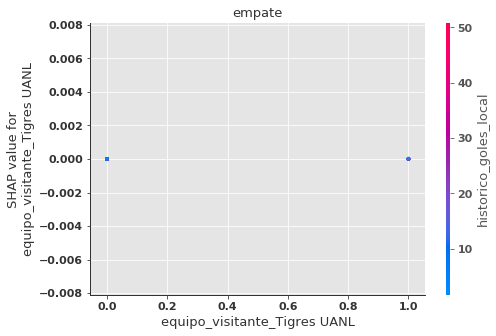

In [154]:
dic_res = {0:'local',1:'visitante',2:'empate'}

for col in x_valid.columns:
    for j in range(3):
        shap.dependence_plot(col, shap_values[j], x_valid, title=dic_res[j])